# Title: 1985 Auto Imports Database

## **PROBLEM OF STATEMENT**


* Prepare a complete data analysis report on the given data.

* Create a predictive model by applying some data science techniques for the price of cars with the available independent variables. That should help the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels










# **Source Information:**

* Creator/Donor: Jeffrey C. Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)


*   Date: 19 May 1987

*   Sources: 1) 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook. 2) Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038 3) Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037









# **Description**

This data set consists of three types of entities:

(a) the specification of an auto in terms of various characteristics,

(b)its assigned insurance risk rating,

(c) its normalized losses in use as compared to other cars.  The second rating corresponds to the degree to which the auto is more risky than its price indicates.Cars are initially assigned a risk factor symbol associated with its price.   Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale.  Actuarians call this process "**symboling**".  
A value of +3 indicates that the auto isrisky, -3 that it is probably pretty safe.The third factor is the relative average loss payment per insured vehicle year.  
This value is normalized for all autos within a particular size classification (two-door small, station wagons,sports/speciality, etc...), and represents the average loss per car per year.

-- Note: Several of the attributes in the database could be used as a
            "class" attribute.

* Number of Instances: 205

* Number of Attributes: 26 total
   -- 15 continuous
   -- 1 integer
   -- 10 nominal

* Attribute Information:     
    
  1. symboling:-3, -2, -1, 0, 1, 2, 3.
  2. normalized-losses:continuous from 65 to 256.
  3. make: alfa-romero, audi, bmw, chevrolet, dodge, honda,isuzu, jaguar, mazda, mercedes-benz, mercury,
  mitsubishi, nissan, peugot, plymouth, porsche renault, saab, subaru, toyota, volkswagen, volvo
  4. fuel-type:                diesel, gas.
  5. aspiration:               std, turbo.
  6. num-of-doors:             four, two.
  7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
  8. drive-wheels:             4wd, fwd, rwd.
  9. engine-location:          front, rear.
 10. wheel-base:               continuous from 86.6 120.9.
 11. length:                   continuous from 141.1 to 208.1.
 12. width:                    continuous from 60.3 to 72.3.
 13. height:                   continuous from 47.8 to 59.8.
 14. curb-weight:              continuous from 1488 to 4066.
 15. engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
 16. num-of-cylinders:         eight, five, four, six, three, twelve, two.
 17. engine-size:              continuous from 61 to 326.
 18. fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
 19. bore:                     continuous from 2.54 to 3.94.
 20. stroke:                   continuous from 2.07 to 4.17.
 21. compression-ratio:        continuous from 7 to 23.
 22. horsepower:               continuous from 48 to 288.
 23. peak-rpm:                 continuous from 4150 to 6600.
 24. city-mpg:                 continuous from 13 to 49.
 25. highway-mpg:              continuous from 16 to 54.
 26. price:                    continuous from 5118 to 45400.

## **Task 1** : Prepare a complete data analysis report on the given data.

# **Import Basic Libraries**

In [1]:
from ast import increment_lineno
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## **Loading Data**

In [2]:
data=pd.read_csv("auto_imports.csv")

In [3]:
data

symboling  normalized_losses         make fuel-type aspiaration  \
0            3                NaN  alfa-romero       gas         std   
1            3                NaN  alfa-romero       gas         std   
2            1                NaN  alfa-romero       gas         std   
3            2              164.0         audi       gas         std   
4            2              164.0         audi       gas         std   
..         ...                ...          ...       ...         ...   
196         -1               95.0        volvo       gas         std   
197         -1               95.0        volvo       gas       turbo   
198         -1               95.0        volvo       gas         std   
199         -1               95.0        volvo    diesel       turbo   
200         -1               95.0        volvo       gas       turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1            two  convertible          rwd           front        88.6  ...   
2            two    hatchback          rwd           front        94.5  ...   
3           four        sedan          fwd           front        99.8  ...   
4           four        sedan          4wd           front        99.4  ...   
..           ...          ...          ...             ...         ...  ...   
196         four        sedan          rwd           front       109.1  ...   
197         four        sedan          rwd           front       109.1  ...   
198         four        sedan          rwd           front       109.1  ...   
199         four        sedan          rwd           front       109.1  ...   
200         four        sedan          rwd           front       109.1  ...   

     engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0            130         mpfi  3.47    2.68               9.0      111.0   
1            130         mpfi  3.47    2.68               9.0      111.0   
2            152         mpfi  2.68    3.47               9.0      154.0   
3            109         mpfi  3.19    3.40              10.0      102.0   
4            136         mpfi  3.19    3.40               8.0      115.0   
..           ...          ...   ...     ...               ...        ...   
196          141         mpfi  3.78    3.15               9.5      114.0   
197          141         mpfi  3.78    3.15               8.7      160.0   
198          173         mpfi  3.58    2.87               8.8      134.0   
199          145          idi  3.01    3.40              23.0      106.0   
200          141         mpfi  3.78    3.15               9.5      114.0   

     peak-rpm city-mpg  highway-mpg  price  
0      5000.0       21           27  13495  
1      5000.0       21           27  16500  
2      5000.0       19           26  16500  
3      5500.0       24           30  13950  
4      5500.0       18           22  17450  
..        ...      ...          ...    ...  
196    5400.0       23           28  16845  
197    5300.0       19           25  19045  
198    5500.0       18           23  21485  
199    4800.0       26           27  22470  
200    5400.0       19           25  22625  

[201 rows x 26 columns]

## **Insights**
* in this Dataset, Price is a Outcome column
* And price is dependent on all those features which are availble in Datasets
*   Price is the Target.
*   Make,model,year,fuel,engine are independant variables.

*   Attributes like make, model, year, and body type can influence prices. Newer models and luxury brands tend to command higher prices.
*   This data is basically tell us about the Price by the management.

* They can accordingly manipulate the design of the cars, the business strategy etc.. to meet certain price levels.

# **Domain Analysis**
*   Price is the Target.

*   Make,model,year,fuel,engine are independant variables.

*   Attributes like make, model, year, and body type can influence prices. Newer models and luxury brands tend to command higher prices.
*   This data is basically tell us about the Price by the management.

* They can accordingly manipulate the design of the cars, the business strategy etc.. to meet certain price levels.

**Symboling**: It Corresponds to a car's insurance risk level.

**Normalized Losses**: It is the relative average loss payment per insured vehicle year.

**Make:** It refers to the brand of the vehicle.

**Aspiration:** A naturally aspirated engine is an internal combustion engine in which air intake depends solely on atmospheric pressure.

**FuelSystem:** The fuel system in a vehicle is the combination of parts needed to carry fuel into and out of the engine.

**WheelBase:** A car's wheelbase is the distance between the centres of the front and rear wheels.

**BodyStyle:** A Car's Body Style refers to the shape and size of your car, and with a multitude of various body styles.

**HorsePower:** Horsepower is a measurement used to calculate how quickly the force is produced from a vehicle's engine.

**PeakRpm:** The normal RPM range for cars on highways is generally between 1500 rpm and 2000 rpm.

**Compression Ratio:** The compression ratio (CR) is defined as the ratio of the volume of the cylinder and its head space.

**Bore and Stroke:** An engine's bore is the diameter of each cylinder, while the stroke is the distance within the cylinder the piston travels.

**City mpg and Highway mpg:** The score a car will get on average in city conditions, with stopping and starting at lower speeds.The average a car will get while driving on an open stretch of road without stopping or starting, typically at a higher speed.


# Basic checks

In [4]:
data.head()

symboling  normalized_losses         make fuel-type aspiaration  \
0          3                NaN  alfa-romero       gas         std   
1          3                NaN  alfa-romero       gas         std   
2          1                NaN  alfa-romero       gas         std   
3          2              164.0         audi       gas         std   
4          2              164.0         audi       gas         std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0          130         mpfi  3.47    2.68               9.0      111.0   
1          130         mpfi  3.47    2.68               9.0      111.0   
2          152         mpfi  2.68    3.47               9.0      154.0   
3          109         mpfi  3.19    3.40              10.0      102.0   
4          136         mpfi  3.19    3.40               8.0      115.0   

   peak-rpm city-mpg  highway-mpg  price  
0    5000.0       21           27  13495  
1    5000.0       21           27  16500  
2    5000.0       19           26  16500  
3    5500.0       24           30  13950  
4    5500.0       18           22  17450  

[5 rows x 26 columns]

In [5]:
data.tail()

symboling  normalized_losses   make fuel-type aspiaration num-of-doors  \
196         -1               95.0  volvo       gas         std         four   
197         -1               95.0  volvo       gas       turbo         four   
198         -1               95.0  volvo       gas         std         four   
199         -1               95.0  volvo    diesel       turbo         four   
200         -1               95.0  volvo       gas       turbo         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
196      sedan          rwd           front       109.1  ...          141   
197      sedan          rwd           front       109.1  ...          141   
198      sedan          rwd           front       109.1  ...          173   
199      sedan          rwd           front       109.1  ...          145   
200      sedan          rwd           front       109.1  ...          141   

     fuel-system  bore  stroke compression-ratio horsepower  peak-rpm  \
196         mpfi  3.78    3.15               9.5      114.0    5400.0   
197         mpfi  3.78    3.15               8.7      160.0    5300.0   
198         mpfi  3.58    2.87               8.8      134.0    5500.0   
199          idi  3.01    3.40              23.0      106.0    4800.0   
200         mpfi  3.78    3.15               9.5      114.0    5400.0   

    city-mpg  highway-mpg  price  
196       23           28  16845  
197       19           25  19045  
198       18           23  21485  
199       26           27  22470  
200       19           25  22625  

[5 rows x 26 columns]

In [6]:
data.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel-type             object
aspiaration           object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cyilnders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiaration        201 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cyilnders   201 non-null    object 
 16  engine-size        201 non

In [8]:
data.describe().T

count          mean          std      min      25%  \
symboling          201.0      0.840796     1.254802    -2.00     0.00   
normalized_losses  164.0    122.000000    35.442168    65.00    94.00   
wheel-base         201.0     98.797015     6.066366    86.60    94.50   
length             201.0    174.200995    12.322175   141.10   166.80   
width              201.0     65.889055     2.101471    60.30    64.10   
height             201.0     53.766667     2.447822    47.80    52.00   
curb-weight        201.0   2555.666667   517.296727  1488.00  2169.00   
engine-size        201.0    126.875622    41.546834    61.00    98.00   
bore               197.0      3.330711     0.270793     2.54     3.15   
stroke             197.0      3.256904     0.319256     2.07     3.11   
compression-ratio  201.0     10.164279     4.004965     7.00     8.60   
horsepower         199.0    103.396985    37.553843    48.00    70.00   
peak-rpm           199.0   5117.587940   480.521824  4150.00  4800.00   
city-mpg           201.0     25.179104     6.423220    13.00    19.00   
highway-mpg        201.0     30.686567     6.815150    16.00    25.00   
price              201.0  13207.129353  7947.066342  5118.00  7775.00   

                        50%       75%       max  
symboling              1.00      2.00      3.00  
normalized_losses    115.00    150.00    256.00  
wheel-base            97.00    102.40    120.90  
length               173.20    183.50    208.10  
width                 65.50     66.60     72.00  
height                54.10     55.50     59.80  
curb-weight         2414.00   2926.00   4066.00  
engine-size          120.00    141.00    326.00  
bore                   3.31      3.59      3.94  
stroke                 3.29      3.41      4.17  
compression-ratio      9.00      9.40     23.00  
horsepower            95.00    116.00    262.00  
peak-rpm            5200.00   5500.00   6600.00  
city-mpg              24.00     30.00     49.00  
highway-mpg           30.00     34.00     54.00  
price              10295.00  16500.00  45400.00

## **Insights**
* Maximum price of the vehicle is 45400
* minimum price of the vehicle is 5118.0


In [9]:
data.size

5226

In [10]:
data.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel-type', 'aspiaration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cyilnders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [11]:
cat_data=data.select_dtypes(include="O").columns

In [12]:
cat_data

Index(['make', 'fuel-type', 'aspiaration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cyilnders',
       'fuel-system'],
      dtype='object')

In [13]:
for i in cat_data:
  print(i,data[i].unique())
  print(data[i].value_counts())
  print("-----------------------")

make ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
renault           2
mercury           1
Name: make, dtype: int64
-----------------------
fuel-type ['gas' 'diesel']
gas       181
diesel     20
Name: fuel-type, dtype: int64
-----------------------
aspiaration ['std' 'turbo']
std      165
turbo     36
Name: aspiaration, dtype: int64
-----------------------
num-of-doors ['two' 'four' nan]
four    113
two      86
Name: num-of

In [14]:
data.isnull().sum()

symboling             0
normalized_losses    37
make                  0
fuel-type             0
aspiaration           0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cyilnders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

# **Exploratory Data Analysis**
* **Univariate Analysis**
* **Bivariate Analysis**
* **Multivarite Analysis**

# **Univariate**

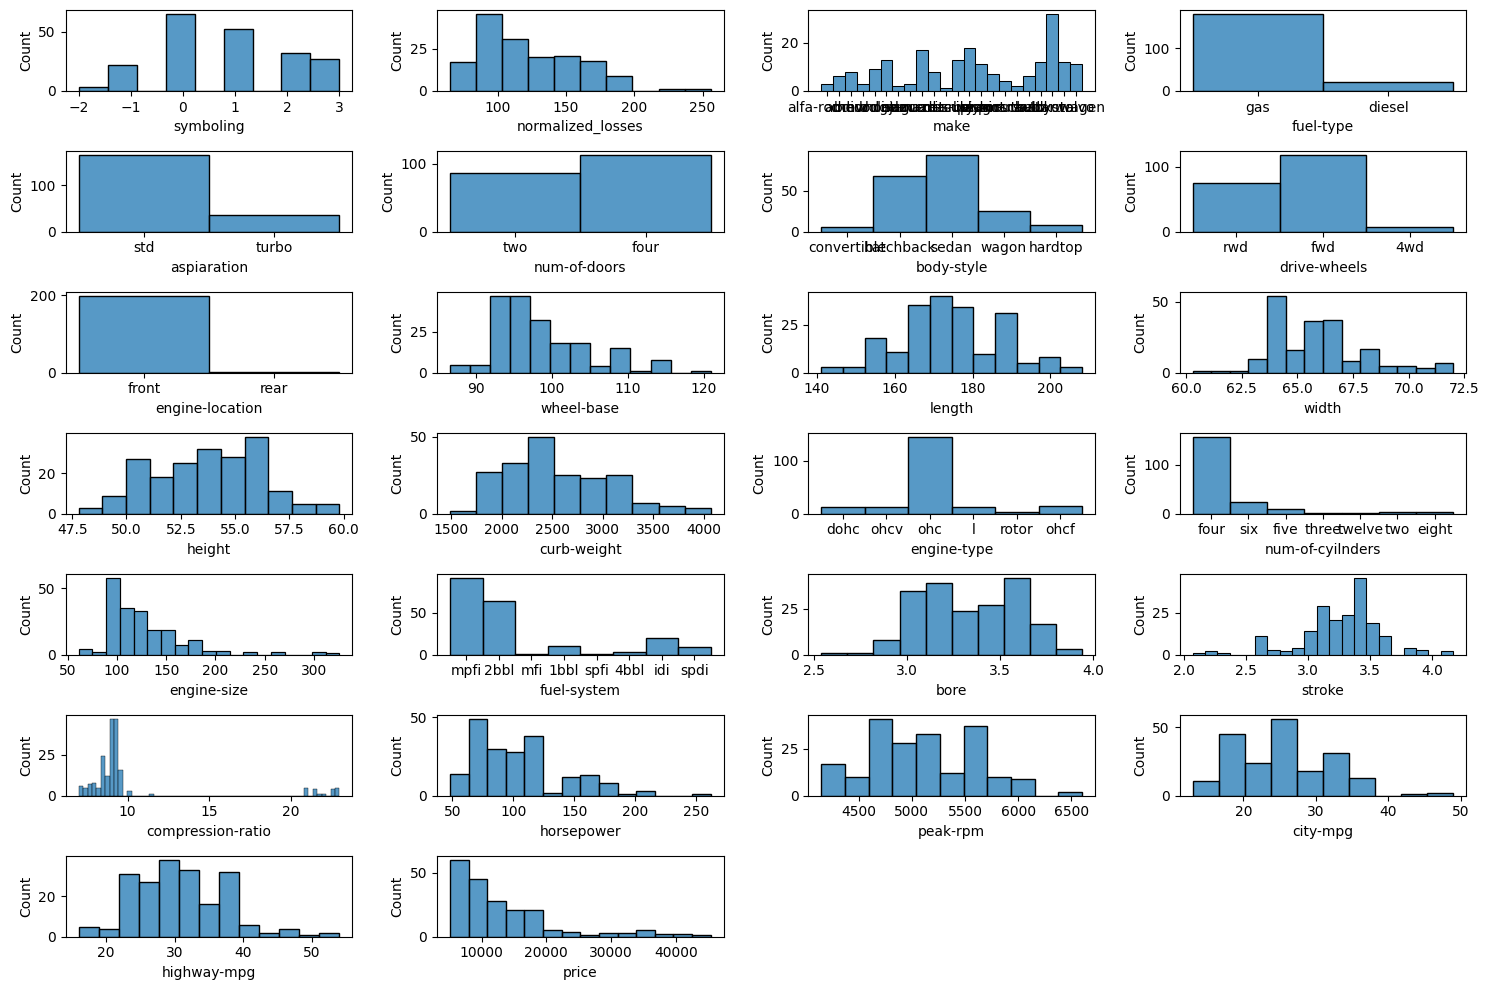

In [15]:
plt.figure(figsize=(15,10),facecolor="white")
plotnumber=1

for column in data:
  if plotnumber<27:
    ax=plt.subplot(7,4,plotnumber)
    sns.histplot(x=data[column])
    plt.xlabel(column,fontsize=10)

  plotnumber+=1
plt.tight_layout()

## **Insights**

*  Car insurance risk level lies between -2 to +2 are the majority values.

*  82% of cars are Average payment loss per year.

*   More than 15% of cars prices belongs to the Toyota,Mazda,nissan and mitsubishi,honda,volkswagon,volvo,peugot,subaru are nearer to 5% and audi,benz,bmw,jaguar are less than 4%

*   Mostly Four doors are likely to use Two doors are slightly less in price.

*   Highly concentrate with Gas fuel comparing to diesel.

*  Standard Aspiration is More price level than the turbo aspiration.

*  Almost every car works better with front wheel drives(fwd) rather than the rear wheel drives(rwd)

*  All people are likely to use engine location is in front side. Thus the price value will be high comparing to rear side engine.

*   Wheel base distance from front wheel to rear wheel ranges from 95 to 102

*   Length of the cars average between 160 to 180 At the same time price will be high in these values. similarly High prices of cars are mostly in heights range from 50 to 55

*   Ohc type of engine is more values among the others like rotor,ohcf,dohc etc..

*   Price will be high which Contains four cylinders.

*  Engine Size should be vary from 100 to 150 in range.

*   Mpfi fuel system is affordable in price.

*   Peak_rpm is generally high in between 4800 to 5200 hence the price value is more for this range.

*   Compression Ratio is defined above 60%

*   Bore,stroke,horsepower ratios are in oscillatory in prices.

# **Bivariate Analysis**

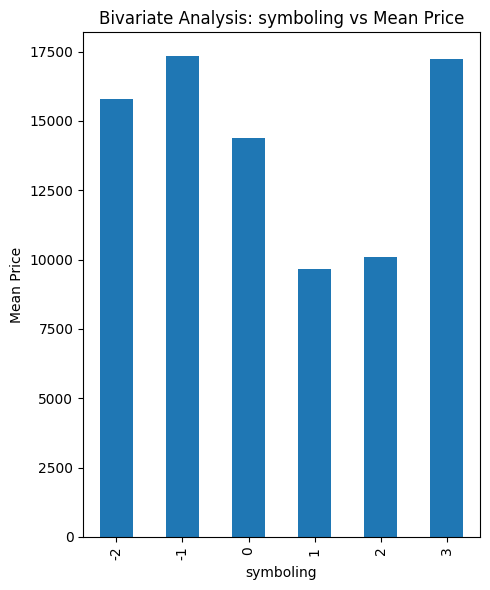

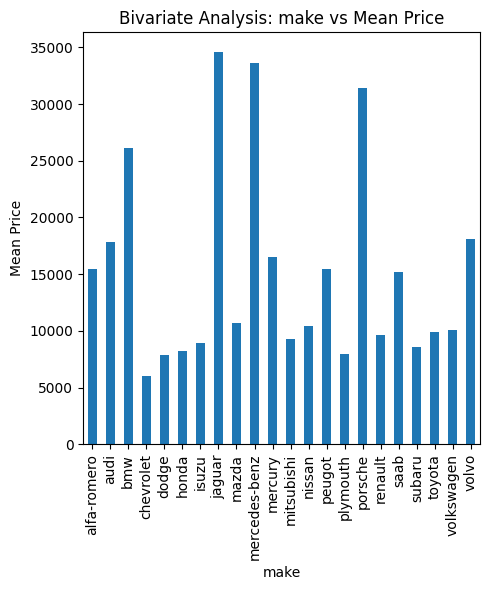

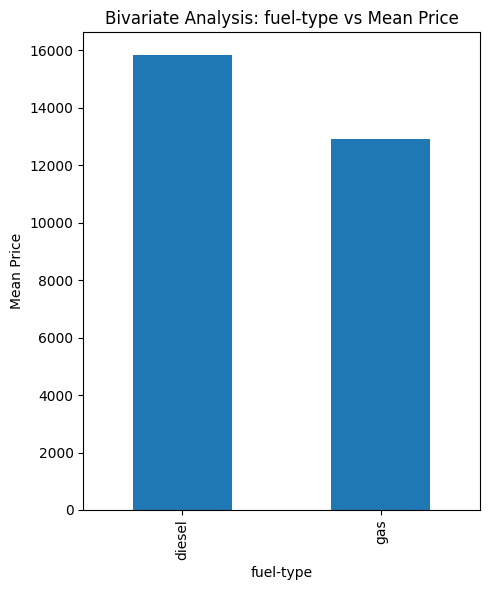

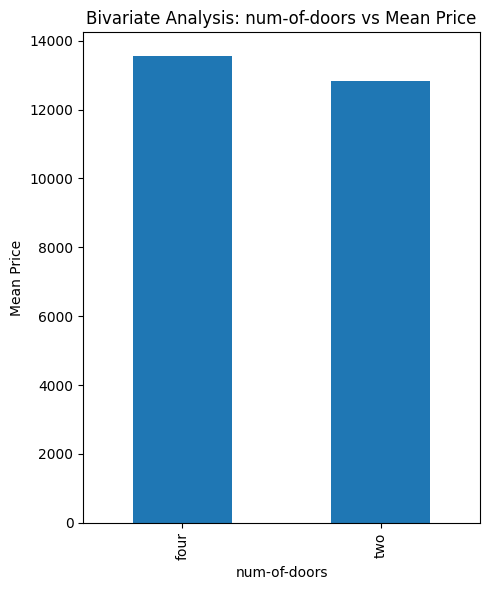

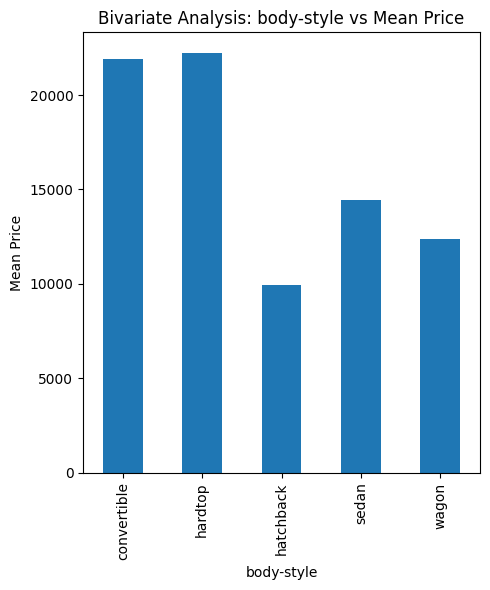

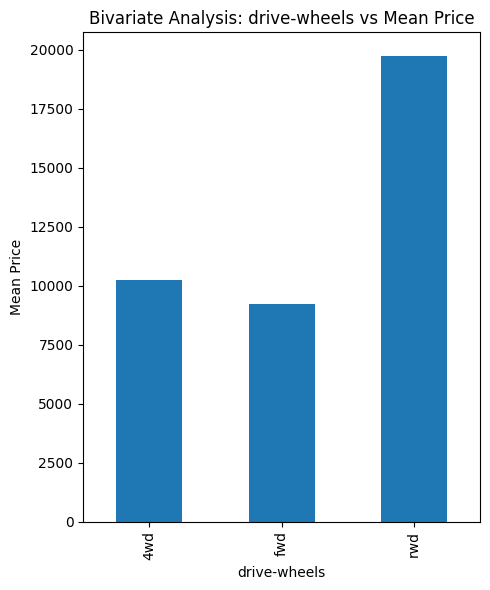

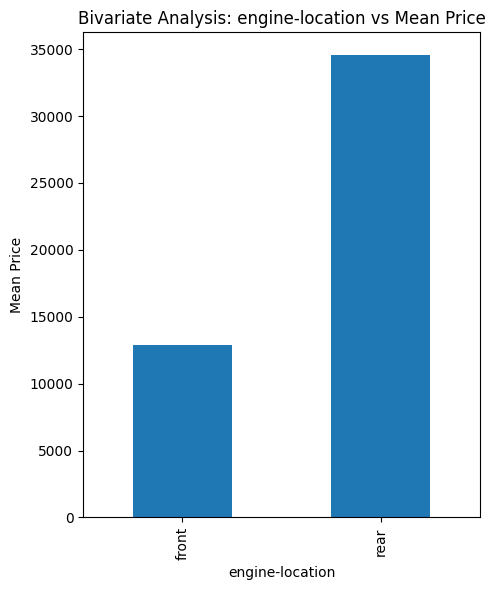

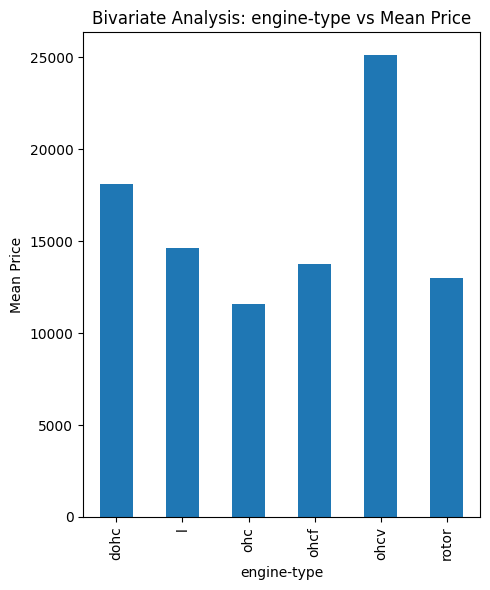

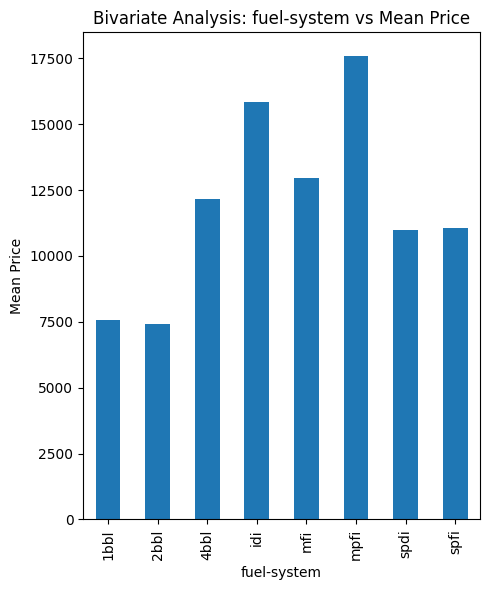

In [16]:
 # List of categorical columns to analyze against the 'price' column
categorical_columns = ["symboling", "make", "fuel-type", "num-of-doors", "body-style", "drive-wheels", "engine-location", "engine-type", "fuel-system"]

# Loop through each column for analysis
for column in categorical_columns:
    # Create a bar plot
    plt.figure(figsize=(5, 6))
    data_grouped = data.groupby(column)["price"].mean()  # Calculate mean price for each category
    data_grouped.plot(kind="bar")
    plt.title(f'Bivariate Analysis: {column} vs Mean Price')
    plt.xlabel(column)
    plt.ylabel('Mean Price')
    plt.tight_layout()
    plt.show()


## **Insights**
* Symboling vs Price:
There isn't a clear trend between the car's risk rating (symboling) and its price. Prices seem to be scattered across different symboling values.

* make vs price:
Car manufacturers seem to have a significant impact on prices. Some brands tend to produce cars with higher prices, while others offer more affordable options.

* Fuel Type vs Price:
Cars with different fuel types (gas or diesel) show a varied price distribution. Diesel cars might have slightly lower prices than gas cars.

* Number of Doors vs Price:
The number of doors doesn't seem to have a strong connection with the car's price. Both two-door and four-door cars are spread across a range of prices.

* Body Style vs Price:
Different body styles (sedan, hatchback, etc.) have different price ranges. For instance, some body styles tend to be priced higher, possibly due to their features or design. Hardtop have a higher price than other style cars.

* Drive Wheels vs Price:
Cars with different drive wheel configurations (e.g., front-wheel drive, rear-wheel driveand four wheel drive) exhibit price variations. Rear wheel drive  configurations have very large number of cars and front wheel drive cars have more price range from low buget car to higher budget cars

* Engine Location vs Price:
Cars with engines placed in different locations (front or rear) have a diverse price distribution. Front engine have relatively more than rear engine.

* Other Numeric Features (e.g., Wheel Base, Length, Width, etc.) vs Price:
Generally, as these features increase, the car prices tend to rise. This suggests that larger cars with more substantial dimensions can often be more expensive.

* Curb Weight vs Price:
Heavier cars tend to have higher prices. This could be due to the use of more advanced materials or larger engines in heavier vehicles.
Engine Type and Size vs Price:

* Engine typre Vs price: Cars with different engine types and sizes show variations in prices. Cars with larger engines might command higher prices.

* Fuel System, Bore, Stroke, Compression Ratio vs Price:
The relationship here might not be as straightforward, as there are several factors at play. Different fuel systems and engine specifications contribute to diverse pricing.

* Horsepower, Peak RPM vs Price:
Generally, cars with higher horsepower and peak RPMs tend to have higher prices, as more powerful engines often come at a premium.
Fuel Efficiency (City MPG, Highway MPG) vs Price:

* Cars with better fuel efficiency (higher MPG) might be priced slightly higher due to the cost-saving advantage they offer over time.

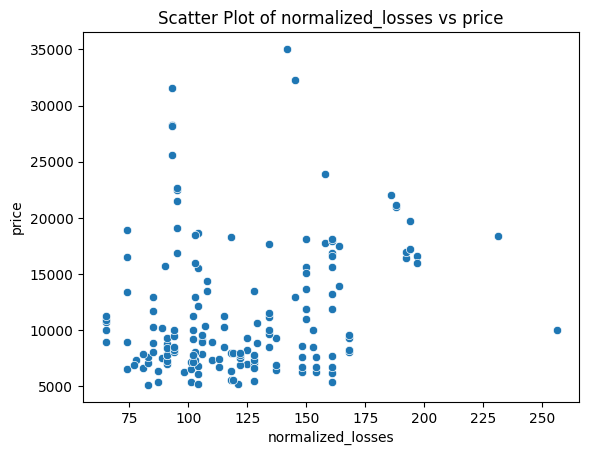

In [17]:
sns.scatterplot(data=data, x='normalized_losses', y='price')
plt.xlabel('normalized_losses')
plt.ylabel('price')
plt.title('Scatter Plot of normalized_losses vs price')
plt.show()

# **Insights**:
* In the scatter plot, the points seem to be scattered without a clear upward or downward trend. This suggests that there isn't a strong linear relationship between normalized losses and the price of the vehicles.
* cross different normalized loss values, there is a wide range of prices. This suggests that normalized losses alone might not be a significant predictor of price.

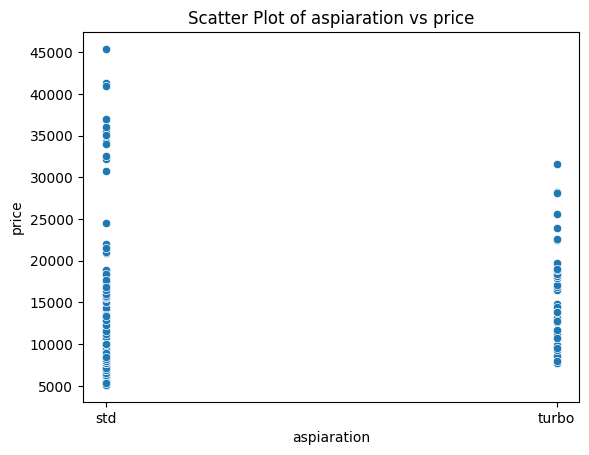

In [18]:
sns.scatterplot(data=data, x='aspiaration', y='price')
plt.xlabel('aspiaration')
plt.ylabel('price')
plt.title('Scatter Plot of aspiaration vs price')
plt.show()

# Insights
* The scatter plot reveals that there are two distinct groups of points along the y-axis (price). These groups likely correspond to the two aspiration types: standard and turbocharged. Vehicles with turbocharged aspiration tend to have lower prices compared to vehicles with standard aspiration.
* You can observe that for both aspiration types, the prices of vehicles vary. However, the prices of turbocharged vehicles generally tend to be lower, and standard exhibit a wider price range compared to standard aspirated vehicles.

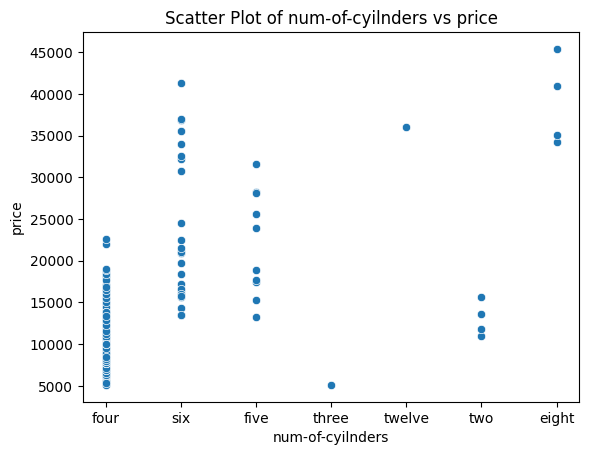

In [19]:
sns.scatterplot(data=data, x='num-of-cyilnders', y='price')
plt.xlabel('num-of-cyilnders')
plt.ylabel('price')
plt.title('Scatter Plot of num-of-cyilnders vs price')
plt.show()

# Insights
* The scatter plot reveals a relationship between the number of cylinders ("num-of-cylinders") and the price of automobiles. The plot indicates that different cylinder counts have distinct price ranges.
* Vehicles with higher cylinder counts tend to exhibit higher prices. This suggests that automobiles with more cylinders are generally considered higher-performance models and are priced accordingly.

# **Multivarite Analysis**

<Figure size 4000x4500 with 0 Axes>

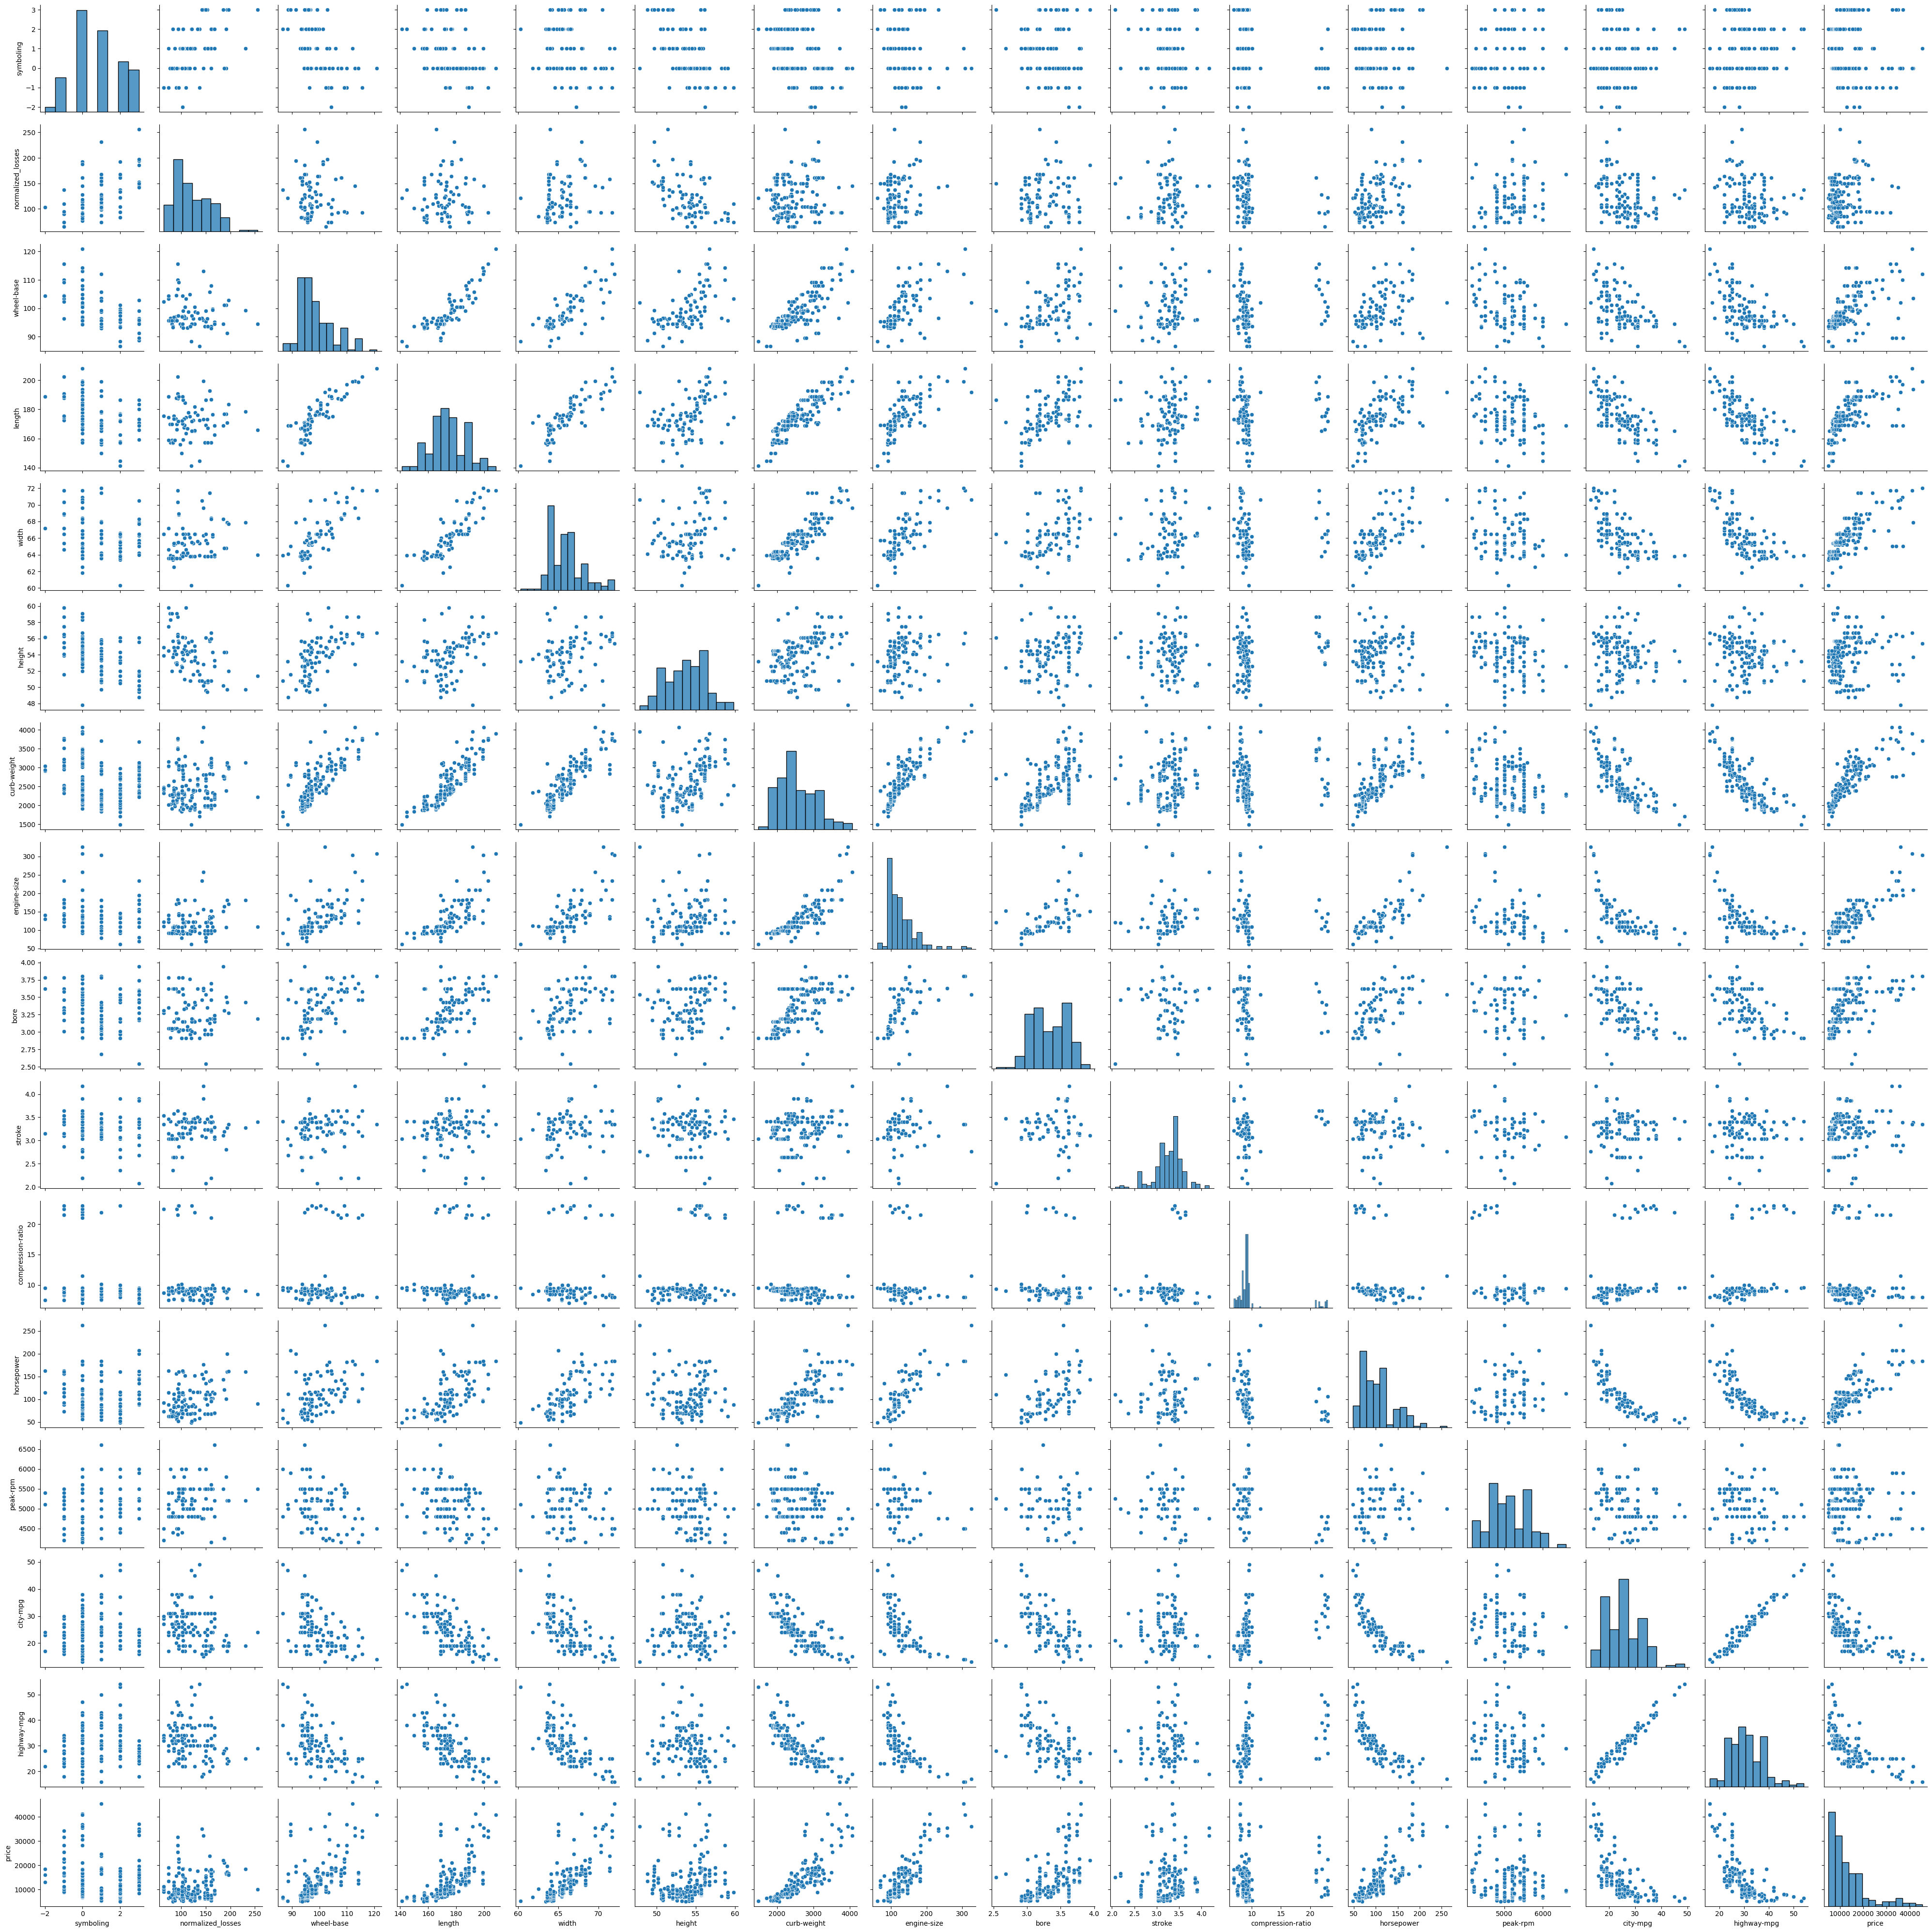

In [20]:
plt.figure(figsize=(40,45))
sns.pairplot(data)
plt.tight_layout()

# **Data Preprocessing**

### Change Rename Columns

In [21]:
data.rename(columns={"normalized_losses":"Normalized_loss","make":"Make","fuel-type":"Fuel_type","aspiaration":"Aspiration","num-of-doors":"Doors","body-style":"Body_style","drive-wheels":"Drive_wheels","engine-location":"Engine_location","wheel-base":"Wheel_base","length":"Length","width":"Width","height":"Height","curb-weight":"Curb_weight","engine-type":"Engine_type","num-of-cyilnders":"Cylinders","engine-size":"Engine_size","fuel-system":"Fuel_system","bore":"Bore","stroke":"Stroke","compression-ratio":"Compression_ratio","horsepower":"Horsepower","peak-rpm":"Peak_rpm","city-mpg":"City_mpg","highway-mpg":"Highway_mpg"},inplace=True)

In [22]:
data.columns

Index(['symboling', 'Normalized_loss', 'Make', 'Fuel_type', 'Aspiration',
       'Doors', 'Body_style', 'Drive_wheels', 'Engine_location', 'Wheel_base',
       'Length', 'Width', 'Height', 'Curb_weight', 'Engine_type', 'Cylinders',
       'Engine_size', 'Fuel_system', 'Bore', 'Stroke', 'Compression_ratio',
       'Horsepower', 'Peak_rpm', 'City_mpg', 'Highway_mpg', 'price'],
      dtype='object')

In [23]:
data.isnull().sum()

symboling             0
Normalized_loss      37
Make                  0
Fuel_type             0
Aspiration            0
Doors                 2
Body_style            0
Drive_wheels          0
Engine_location       0
Wheel_base            0
Length                0
Width                 0
Height                0
Curb_weight           0
Engine_type           0
Cylinders             0
Engine_size           0
Fuel_system           0
Bore                  4
Stroke                4
Compression_ratio     0
Horsepower            2
Peak_rpm              2
City_mpg              0
Highway_mpg           0
price                 0
dtype: int64

In [24]:
data.duplicated().sum()

0

In [25]:
data.dtypes

symboling              int64
Normalized_loss      float64
Make                  object
Fuel_type             object
Aspiration            object
Doors                 object
Body_style            object
Drive_wheels          object
Engine_location       object
Wheel_base           float64
Length               float64
Width                float64
Height               float64
Curb_weight            int64
Engine_type           object
Cylinders             object
Engine_size            int64
Fuel_system           object
Bore                 float64
Stroke               float64
Compression_ratio    float64
Horsepower           float64
Peak_rpm             float64
City_mpg               int64
Highway_mpg            int64
price                  int64
dtype: object

## Replacing null values

### Replacing null values for normalized_loss

<Axes: xlabel='Normalized_loss', ylabel='Count'>

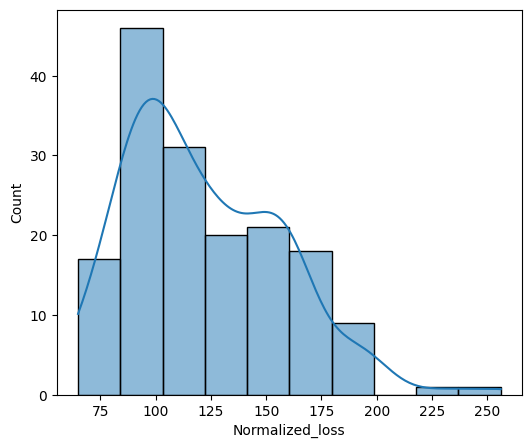

In [26]:
plt.figure(figsize=(6,5))
sns.histplot(data=data,x="Normalized_loss",kde=True)

* Here we have left-skewed data (Left-skewed data means that the majority of the data points are clustered on the right side of the distribution, leaving a long tail towards the left)
* Mean/Median Imputation: For left-skewed data, median imputation might be more appropriate than mean imputation. The median is less affected by outliers in the tail of the distribution.
* So go with median

In [27]:
data["Normalized_loss"].median()

115.0

In [28]:
data.loc[data["Normalized_loss"].isnull()==True,"Normalized_loss"]=115.0

In [29]:
data.isnull().sum()

symboling            0
Normalized_loss      0
Make                 0
Fuel_type            0
Aspiration           0
Doors                2
Body_style           0
Drive_wheels         0
Engine_location      0
Wheel_base           0
Length               0
Width                0
Height               0
Curb_weight          0
Engine_type          0
Cylinders            0
Engine_size          0
Fuel_system          0
Bore                 4
Stroke               4
Compression_ratio    0
Horsepower           2
Peak_rpm             2
City_mpg             0
Highway_mpg          0
price                0
dtype: int64

### Replacing null values for doors

<Axes: xlabel='Doors', ylabel='Count'>

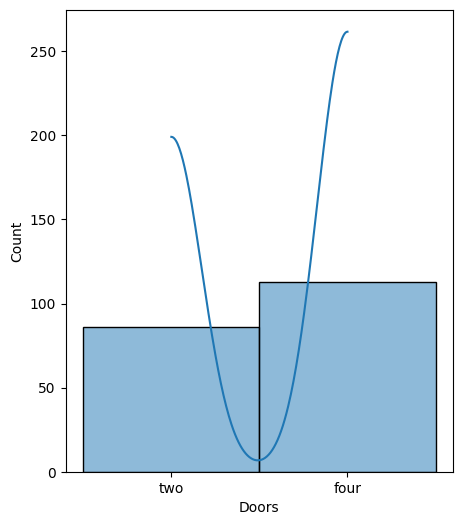

In [30]:
plt.figure(figsize=(5,6))
sns.histplot(data=data,x=data.Doors,kde=True)

In [31]:
data["Doors"].mode()

0    four
Name: Doors, dtype: object

In [32]:
data.Doors.unique()
data.Doors.value_counts()

four    113
two      86
Name: Doors, dtype: int64

In [33]:
data.loc[data["Doors"].isnull()==True,"Doors"]="four"

In [34]:
data.isnull().sum()

symboling            0
Normalized_loss      0
Make                 0
Fuel_type            0
Aspiration           0
Doors                0
Body_style           0
Drive_wheels         0
Engine_location      0
Wheel_base           0
Length               0
Width                0
Height               0
Curb_weight          0
Engine_type          0
Cylinders            0
Engine_size          0
Fuel_system          0
Bore                 4
Stroke               4
Compression_ratio    0
Horsepower           2
Peak_rpm             2
City_mpg             0
Highway_mpg          0
price                0
dtype: int64

### Replacing null values for bore

<Axes: xlabel='Bore', ylabel='Count'>

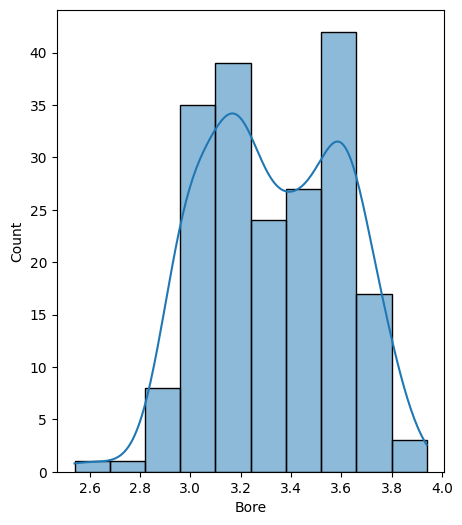

In [35]:
plt.figure(figsize=(5,6))
sns.histplot(data=data,x=data.Bore,kde="True")

In [36]:
data["Bore"].median()

3.31

In [37]:
data.loc[data["Bore"].isnull()==True,"Bore"]=3.31

### Replacing null values for stroke

<Axes: xlabel='Stroke', ylabel='Count'>

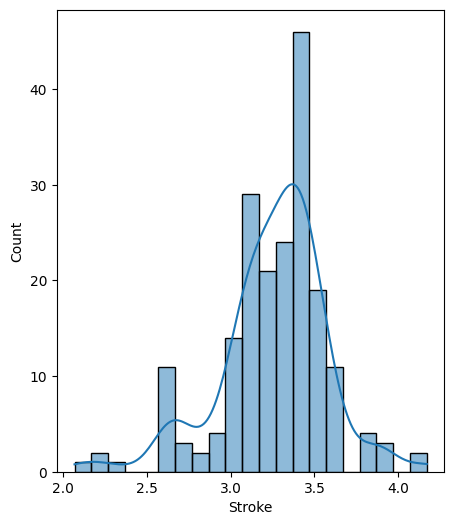

In [38]:
plt.figure(figsize=(5,6))
sns.histplot(data=data,x=data.Stroke,kde=True)

In [39]:
data["Stroke"].median()

3.29

In [40]:
data.loc[data["Stroke"].isnull()==True,"Stroke"]=3.29

In [41]:
data.isnull().sum()

symboling            0
Normalized_loss      0
Make                 0
Fuel_type            0
Aspiration           0
Doors                0
Body_style           0
Drive_wheels         0
Engine_location      0
Wheel_base           0
Length               0
Width                0
Height               0
Curb_weight          0
Engine_type          0
Cylinders            0
Engine_size          0
Fuel_system          0
Bore                 0
Stroke               0
Compression_ratio    0
Horsepower           2
Peak_rpm             2
City_mpg             0
Highway_mpg          0
price                0
dtype: int64

### Replacing null values for horsepower

<Axes: xlabel='Horsepower', ylabel='Count'>

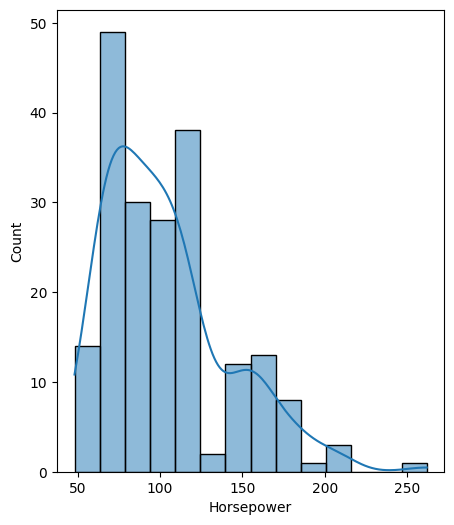

In [42]:
plt.figure(figsize=(5,6))
sns.histplot(data=data,x=data.Horsepower,kde="True")

In [43]:
data["Horsepower"].median()

95.0

In [44]:
data.loc[data["Horsepower"].isnull()==True,"Horsepower"]=95.0

In [45]:
data.isnull().sum()

symboling            0
Normalized_loss      0
Make                 0
Fuel_type            0
Aspiration           0
Doors                0
Body_style           0
Drive_wheels         0
Engine_location      0
Wheel_base           0
Length               0
Width                0
Height               0
Curb_weight          0
Engine_type          0
Cylinders            0
Engine_size          0
Fuel_system          0
Bore                 0
Stroke               0
Compression_ratio    0
Horsepower           0
Peak_rpm             2
City_mpg             0
Highway_mpg          0
price                0
dtype: int64

### Replacing null values for peak_rpm

<Axes: xlabel='Peak_rpm', ylabel='Count'>

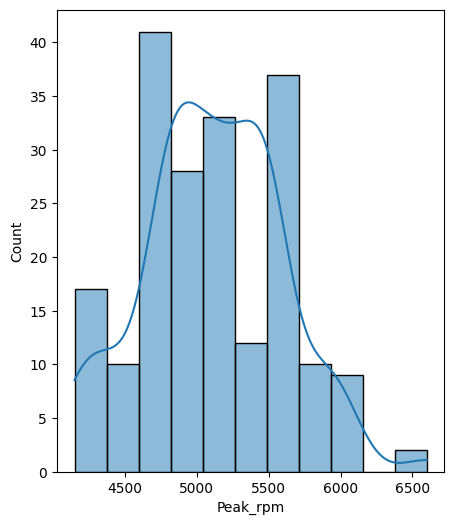

In [46]:
plt.figure(figsize=(5,6))
sns.histplot(data=data,x=data.Peak_rpm,kde="True")

In [47]:
data["Peak_rpm"].median()

5200.0

In [48]:
data.loc[data["Peak_rpm"].isnull()==True,"Peak_rpm"]=5200.0

In [49]:
data.isnull().sum()

symboling            0
Normalized_loss      0
Make                 0
Fuel_type            0
Aspiration           0
Doors                0
Body_style           0
Drive_wheels         0
Engine_location      0
Wheel_base           0
Length               0
Width                0
Height               0
Curb_weight          0
Engine_type          0
Cylinders            0
Engine_size          0
Fuel_system          0
Bore                 0
Stroke               0
Compression_ratio    0
Horsepower           0
Peak_rpm             0
City_mpg             0
Highway_mpg          0
price                0
dtype: int64

# Check for Outliers

In [50]:
num_data=data.select_dtypes(include=["int64","float64"]).columns

In [51]:
num_data

Index(['symboling', 'Normalized_loss', 'Wheel_base', 'Length', 'Width',
       'Height', 'Curb_weight', 'Engine_size', 'Bore', 'Stroke',
       'Compression_ratio', 'Horsepower', 'Peak_rpm', 'City_mpg',
       'Highway_mpg', 'price'],
      dtype='object')

In [52]:
cat_data

Index(['make', 'fuel-type', 'aspiaration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cyilnders',
       'fuel-system'],
      dtype='object')

In [53]:
data1=num_data.copy()
data1

Index(['symboling', 'Normalized_loss', 'Wheel_base', 'Length', 'Width',
       'Height', 'Curb_weight', 'Engine_size', 'Bore', 'Stroke',
       'Compression_ratio', 'Horsepower', 'Peak_rpm', 'City_mpg',
       'Highway_mpg', 'price'],
      dtype='object')

In [54]:
data2=cat_data.copy()
data2

Index(['make', 'fuel-type', 'aspiaration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cyilnders',
       'fuel-system'],
      dtype='object')

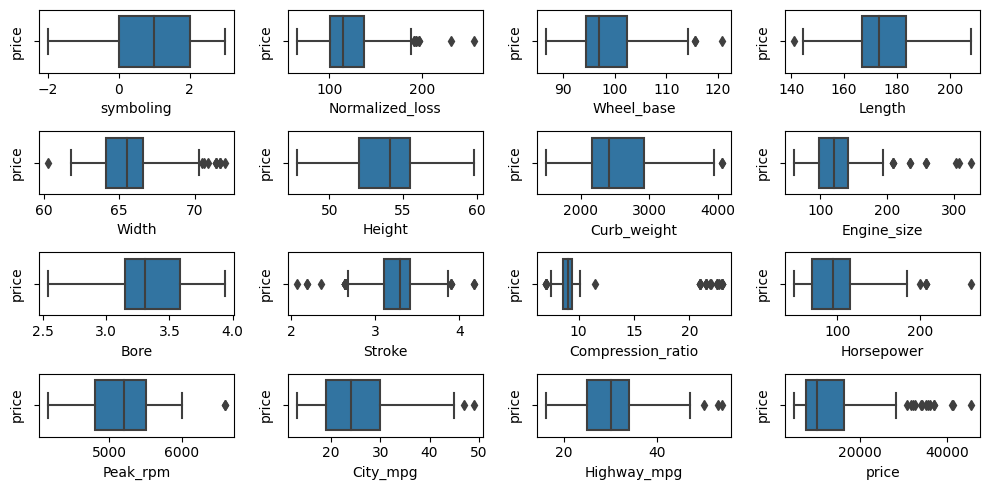

In [55]:
plt.figure(figsize=(10,5),facecolor="white")
plotnumber=1

for column in data1:
  if plotnumber<17:
    ax=plt.subplot(4,4,plotnumber)
    sns.boxplot(x=data[column])
    plt.xlabel(column,fontsize=10)
    plt.ylabel("price",fontsize=10)
  plotnumber+=1
plt.tight_layout()

### OUTLIERS FOR NORMALIZED_LOSS

<Axes: xlabel='Normalized_loss', ylabel='Count'>

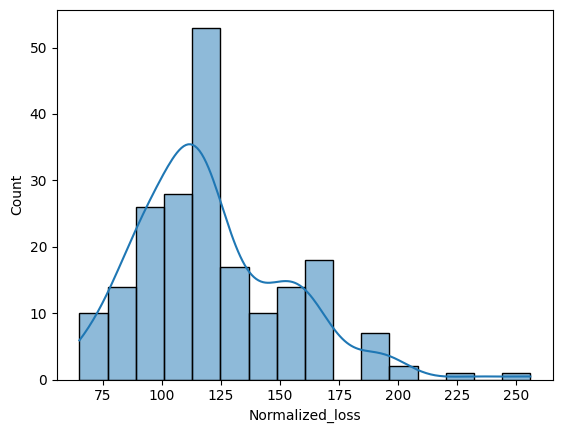

In [56]:
sns.histplot(data=data,x='Normalized_loss',kde=True)

In [57]:
Q1=data["Normalized_loss"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["Normalized_loss"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 101.0
upper_quartile 137.0


In [58]:
IQR=Q3-Q1
IQR

36.0

In [59]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 47.0
upper_limit is 191.0


In [60]:
len(data.loc[data["Normalized_loss"]>upper_limit])/len(data)

0.03980099502487562

In [61]:
data.loc[data["Normalized_loss"]>upper_limit]

symboling  Normalized_loss        Make Fuel_type Aspiration Doors  \
9            2            192.0         bmw       gas        std   two   
10           0            192.0         bmw       gas        std  four   
101          3            194.0      nissan       gas        std   two   
102          3            194.0      nissan       gas      turbo   two   
103          1            231.0      nissan       gas        std   two   
174          3            197.0      toyota       gas        std   two   
175          3            197.0      toyota       gas        std   two   
186          3            256.0  volkswagen       gas        std   two   

    Body_style Drive_wheels Engine_location  Wheel_base  ...  Engine_size  \
9        sedan          rwd           front       101.2  ...          108   
10       sedan          rwd           front       101.2  ...          108   
101  hatchback          rwd           front        91.3  ...          181   
102  hatchback          rwd           front        91.3  ...          181   
103  hatchback          rwd           front        99.2  ...          181   
174  hatchback          rwd           front       102.9  ...          171   
175  hatchback          rwd           front       102.9  ...          171   
186  hatchback          fwd           front        94.5  ...          109   

     Fuel_system  Bore  Stroke Compression_ratio Horsepower  Peak_rpm  \
9           mpfi  3.50    2.80               8.8      101.0    5800.0   
10          mpfi  3.50    2.80               8.8      101.0    5800.0   
101         mpfi  3.43    3.27               9.0      160.0    5200.0   
102         mpfi  3.43    3.27               7.8      200.0    5200.0   
103         mpfi  3.43    3.27               9.0      160.0    5200.0   
174         mpfi  3.27    3.35               9.3      161.0    5200.0   
175         mpfi  3.27    3.35               9.3      161.0    5200.0   
186         mpfi  3.19    3.40               8.5       90.0    5500.0   

    City_mpg  Highway_mpg  price  
9         23           29  16430  
10        23           29  16925  
101       19           25  17199  
102       17           23  19699  
103       19           25  18399  
174       20           24  16558  
175       19           24  15998  
186       24           29   9980  

[8 rows x 26 columns]

In [62]:
data.loc[data["Normalized_loss"]>upper_limit,"Normalized_loss"]=data["Normalized_loss"].median()

<Axes: xlabel='Normalized_loss'>

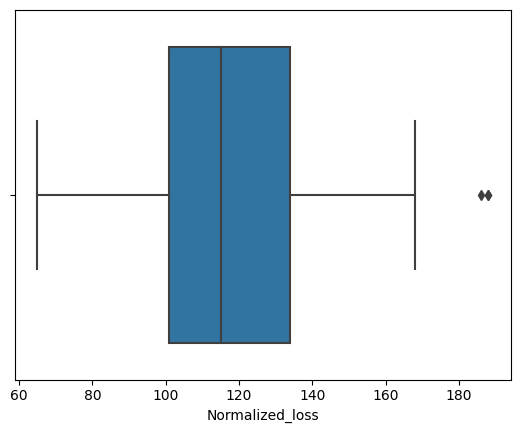

In [63]:
sns.boxplot(x=data.Normalized_loss)

<Axes: xlabel='Normalized_loss', ylabel='Count'>

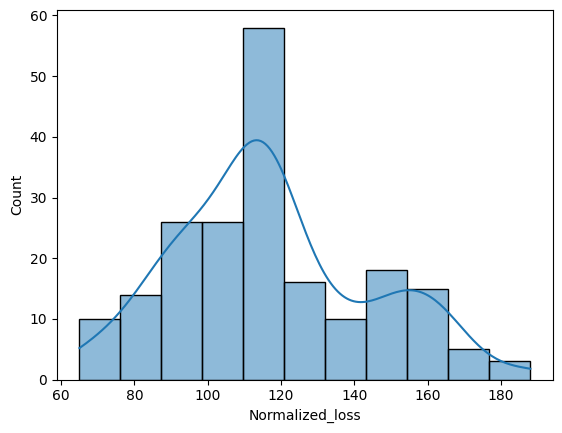

In [64]:
sns.histplot(data=data,x='Normalized_loss',kde=True)

### OUTLIERS FOR WHEEL_BASE

<Axes: xlabel='Normalized_loss', ylabel='Count'>

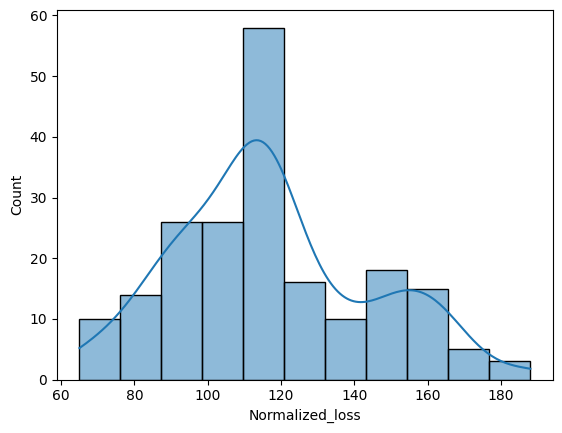

In [65]:
sns.histplot(data=data,x='Normalized_loss',kde=True)

In [66]:
Q1=data["Wheel_base"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["Wheel_base"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 94.5
upper_quartile 102.4


In [67]:
IQR=Q3-Q1
IQR

7.900000000000006

In [68]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 82.64999999999999
upper_limit is 114.25000000000001


In [69]:
data.loc[data["Wheel_base"]>upper_limit]

symboling  Normalized_loss           Make Fuel_type Aspiration Doors  \
67         -1             93.0  mercedes-benz    diesel      turbo  four   
68         -1            115.0  mercedes-benz       gas        std  four   
70          0            115.0  mercedes-benz       gas        std  four   

   Body_style Drive_wheels Engine_location  Wheel_base  ...  Engine_size  \
67      sedan          rwd           front       115.6  ...          183   
68      sedan          rwd           front       115.6  ...          234   
70      sedan          rwd           front       120.9  ...          308   

    Fuel_system  Bore  Stroke Compression_ratio Horsepower  Peak_rpm City_mpg  \
67          idi  3.58    3.64              21.5      123.0    4350.0       22   
68         mpfi  3.46    3.10               8.3      155.0    4750.0       16   
70         mpfi  3.80    3.35               8.0      184.0    4500.0       14   

    Highway_mpg  price  
67           25  31600  
68           18  34184  
70           16  40960  

[3 rows x 26 columns]

In [70]:
len(data.loc[data["Wheel_base"]>upper_limit])/len(data)

0.014925373134328358

In [71]:
data.loc[data["Wheel_base"]>upper_limit,"Wheel_base"]=data["Wheel_base"].median()

<Axes: xlabel='Wheel_base'>

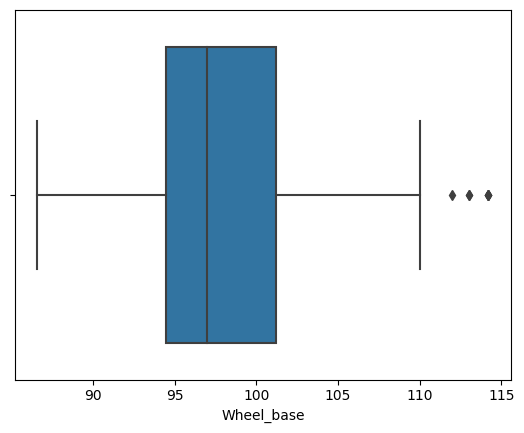

In [72]:
sns.boxplot(x=data.Wheel_base)

### OUTLIERS FOR LENGTH

<Axes: xlabel='Length', ylabel='Count'>

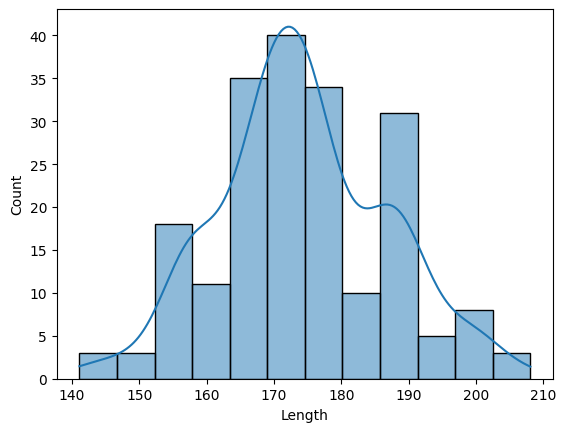

In [73]:
sns.histplot(data=data,x='Length',kde=True)

In [74]:
Q1=data["Length"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["Length"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 166.8
upper_quartile 183.5


In [75]:
IQR=Q3-Q1
IQR

16.69999999999999

In [76]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 141.75000000000003
upper_limit is 208.54999999999998


In [77]:
data.loc[data["Length"]<lower_limit]

symboling  Normalized_loss       Make Fuel_type Aspiration Doors  \
17          2            121.0  chevrolet       gas        std   two   

   Body_style Drive_wheels Engine_location  Wheel_base  ...  Engine_size  \
17  hatchback          fwd           front        88.4  ...           61   

    Fuel_system  Bore  Stroke Compression_ratio Horsepower  Peak_rpm City_mpg  \
17         2bbl  2.91    3.03               9.5       48.0    5100.0       47   

    Highway_mpg  price  
17           53   5151  

[1 rows x 26 columns]

In [78]:
len(data.loc[data["Wheel_base"]<lower_limit])/len(data)

1.0

<Axes: xlabel='Length'>

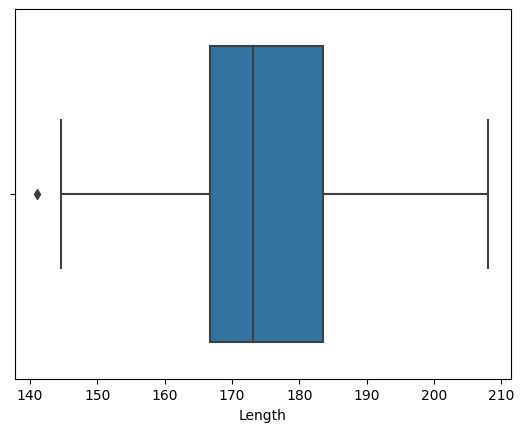

In [79]:
sns.boxplot(x=data.Length)

### OUTLIERS FOR WIDTH

<Axes: xlabel='Width', ylabel='Count'>

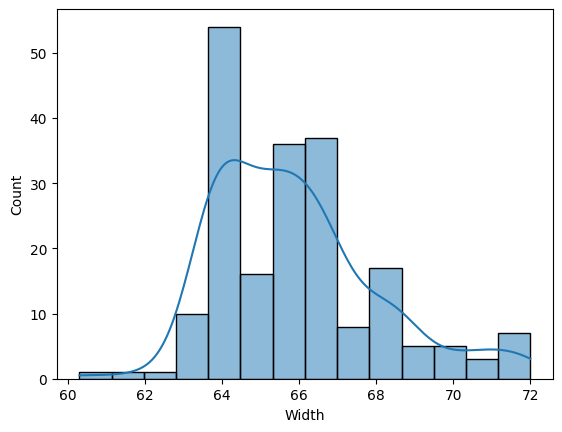

In [80]:
sns.histplot(data=data,x='Width',kde=True)

In [81]:
Q1=data["Width"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["Width"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 64.1
upper_quartile 66.6


In [82]:
IQR=Q3-Q1
IQR

2.5

In [83]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 60.349999999999994
upper_limit is 70.35


In [84]:
data.loc[data["Width"]<lower_limit]

symboling  Normalized_loss       Make Fuel_type Aspiration Doors  \
17          2            121.0  chevrolet       gas        std   two   

   Body_style Drive_wheels Engine_location  Wheel_base  ...  Engine_size  \
17  hatchback          fwd           front        88.4  ...           61   

    Fuel_system  Bore  Stroke Compression_ratio Horsepower  Peak_rpm City_mpg  \
17         2bbl  2.91    3.03               9.5       48.0    5100.0       47   

    Highway_mpg  price  
17           53   5151  

[1 rows x 26 columns]

In [85]:
len(data.loc[data["Width"]<lower_limit])/len(data)

0.004975124378109453

In [86]:
data.loc[data["Width"]>upper_limit]

symboling  Normalized_loss           Make Fuel_type Aspiration Doors  \
6           1            158.0           audi       gas        std  four   
7           1            115.0           audi       gas        std  four   
8           1            158.0           audi       gas      turbo  four   
16          0            115.0            bmw       gas        std  four   
46          0            115.0         jaguar       gas        std   two   
67         -1             93.0  mercedes-benz    diesel      turbo  four   
68         -1            115.0  mercedes-benz       gas        std  four   
69          3            142.0  mercedes-benz       gas        std   two   
70          0            115.0  mercedes-benz       gas        std  four   
71          1            115.0  mercedes-benz       gas        std   two   

     Body_style Drive_wheels Engine_location  Wheel_base  ...  Engine_size  \
6         sedan          fwd           front       105.8  ...          136   
7         wagon          fwd           front       105.8  ...          136   
8         sedan          fwd           front       105.8  ...          131   
16        sedan          rwd           front       110.0  ...          209   
46        sedan          rwd           front       102.0  ...          326   
67        sedan          rwd           front        97.0  ...          183   
68        sedan          rwd           front        97.0  ...          234   
69  convertible          rwd           front        96.6  ...          234   
70        sedan          rwd           front        97.0  ...          308   
71      hardtop          rwd           front       112.0  ...          304   

    Fuel_system  Bore  Stroke Compression_ratio Horsepower  Peak_rpm City_mpg  \
6          mpfi  3.19    3.40               8.5      110.0    5500.0       19   
7          mpfi  3.19    3.40               8.5      110.0    5500.0       19   
8          mpfi  3.13    3.40               8.3      140.0    5500.0       17   
16         mpfi  3.62    3.39               8.0      182.0    5400.0       15   
46         mpfi  3.54    2.76              11.5      262.0    5000.0       13   
67          idi  3.58    3.64              21.5      123.0    4350.0       22   
68         mpfi  3.46    3.10               8.3      155.0    4750.0       16   
69         mpfi  3.46    3.10               8.3      155.0    4750.0       16   
70         mpfi  3.80    3.35               8.0      184.0    4500.0       14   
71         mpfi  3.80    3.35               8.0      184.0    4500.0       14   

    Highway_mpg  price  
6            25  17710  
7            25  18920  
8            20  23875  
16           20  36880  
46           17  36000  
67           25  31600  
68           18  34184  
69           18  35056  
70           16  40960  
71           16  45400  

[10 rows x 26 columns]

In [87]:
len(data.loc[data["Normalized_loss"]>upper_limit])/len(data)

0.9751243781094527

In [88]:
data.loc[data["Width"]<lower_limit,"Width"]=data["Width"].median()

<Axes: xlabel='Width'>

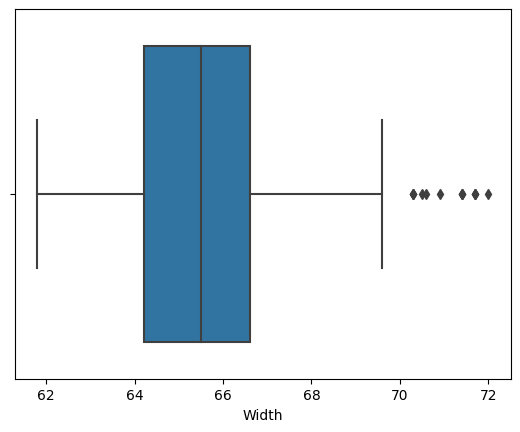

In [89]:
sns.boxplot(x=data.Width)

### OUTLIERS FOR CURB_WEIGHTS

<Axes: xlabel='Curb_weight', ylabel='Count'>

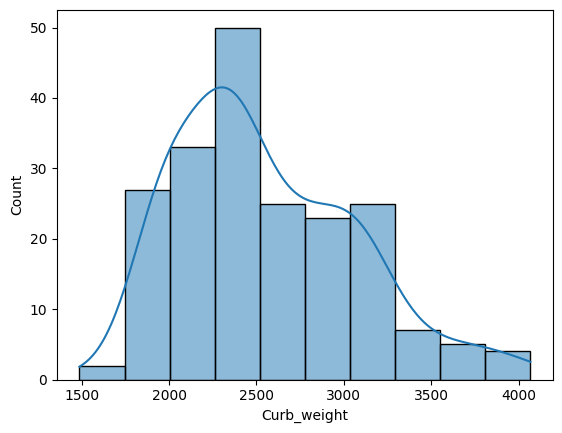

In [90]:
sns.histplot(data=data,x='Curb_weight',kde=True)

In [91]:
Q1=data["Curb_weight"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["Curb_weight"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 2169.0
upper_quartile 2926.0


In [92]:
IQR=Q3-Q1
IQR

757.0

In [93]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 1033.5
upper_limit is 4061.5


In [94]:
data.loc[data["Curb_weight"]<lower_limit]

Empty DataFrame
Columns: [symboling, Normalized_loss, Make, Fuel_type, Aspiration, Doors, Body_style, Drive_wheels, Engine_location, Wheel_base, Length, Width, Height, Curb_weight, Engine_type, Cylinders, Engine_size, Fuel_system, Bore, Stroke, Compression_ratio, Horsepower, Peak_rpm, City_mpg, Highway_mpg, price]
Index: []

[0 rows x 26 columns]

In [95]:
data.loc[data["Curb_weight"]>upper_limit]

symboling  Normalized_loss    Make Fuel_type Aspiration Doors Body_style  \
44          0            145.0  jaguar       gas        std  four      sedan   
45          0            115.0  jaguar       gas        std  four      sedan   

   Drive_wheels Engine_location  Wheel_base  ...  Engine_size  Fuel_system  \
44          rwd           front       113.0  ...          258         mpfi   
45          rwd           front       113.0  ...          258         mpfi   

    Bore  Stroke Compression_ratio Horsepower  Peak_rpm City_mpg  Highway_mpg  \
44  3.63    4.17               8.1      176.0    4750.0       15           19   
45  3.63    4.17               8.1      176.0    4750.0       15           19   

    price  
44  32250  
45  35550  

[2 rows x 26 columns]

In [96]:
len(data.loc[data["Curb_weight"]>upper_limit])/len(data)

0.009950248756218905

In [97]:
data.loc[data["Curb_weight"]>upper_limit,"Curb_weight"]=data["Curb_weight"].median()

<Axes: xlabel='Curb_weight'>

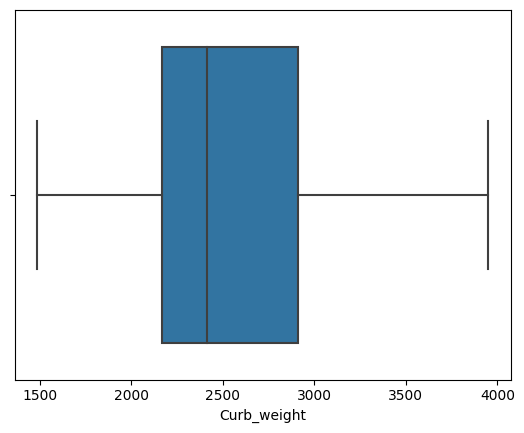

In [98]:
sns.boxplot(x=data.Curb_weight)

### OUTLIERS FOR ENGINE SIZE

<Axes: xlabel='Curb_weight', ylabel='Count'>

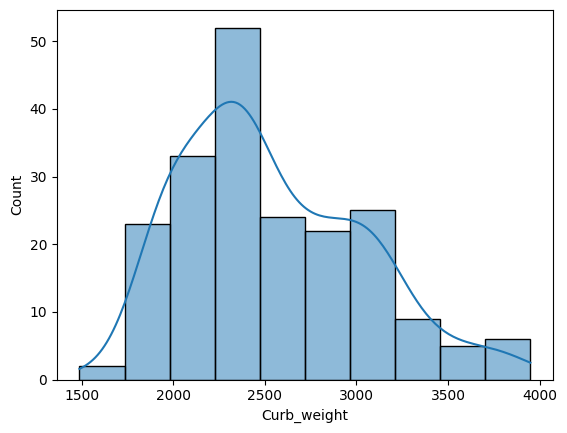

In [99]:
sns.histplot(data=data,x='Curb_weight',kde=True)

In [100]:
Q1=data["Engine_size"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["Engine_size"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 98.0
upper_quartile 141.0


In [101]:
IQR=Q3-Q1
IQR

43.0

In [102]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 33.5
upper_limit is 205.5


In [103]:
data.loc[data["Engine_size"]>upper_limit]

symboling  Normalized_loss           Make Fuel_type Aspiration Doors  \
14          0            115.0            bmw       gas        std  four   
15          0            115.0            bmw       gas        std   two   
16          0            115.0            bmw       gas        std  four   
44          0            145.0         jaguar       gas        std  four   
45          0            115.0         jaguar       gas        std  four   
46          0            115.0         jaguar       gas        std   two   
68         -1            115.0  mercedes-benz       gas        std  four   
69          3            142.0  mercedes-benz       gas        std   two   
70          0            115.0  mercedes-benz       gas        std  four   
71          1            115.0  mercedes-benz       gas        std   two   

     Body_style Drive_wheels Engine_location  Wheel_base  ...  Engine_size  \
14        sedan          rwd           front       103.5  ...          209   
15        sedan          rwd           front       103.5  ...          209   
16        sedan          rwd           front       110.0  ...          209   
44        sedan          rwd           front       113.0  ...          258   
45        sedan          rwd           front       113.0  ...          258   
46        sedan          rwd           front       102.0  ...          326   
68        sedan          rwd           front        97.0  ...          234   
69  convertible          rwd           front        96.6  ...          234   
70        sedan          rwd           front        97.0  ...          308   
71      hardtop          rwd           front       112.0  ...          304   

    Fuel_system  Bore  Stroke Compression_ratio Horsepower  Peak_rpm City_mpg  \
14         mpfi  3.62    3.39               8.0      182.0    5400.0       16   
15         mpfi  3.62    3.39               8.0      182.0    5400.0       16   
16         mpfi  3.62    3.39               8.0      182.0    5400.0       15   
44         mpfi  3.63    4.17               8.1      176.0    4750.0       15   
45         mpfi  3.63    4.17               8.1      176.0    4750.0       15   
46         mpfi  3.54    2.76              11.5      262.0    5000.0       13   
68         mpfi  3.46    3.10               8.3      155.0    4750.0       16   
69         mpfi  3.46    3.10               8.3      155.0    4750.0       16   
70         mpfi  3.80    3.35               8.0      184.0    4500.0       14   
71         mpfi  3.80    3.35               8.0      184.0    4500.0       14   

    Highway_mpg  price  
14           22  30760  
15           22  41315  
16           20  36880  
44           19  32250  
45           19  35550  
46           17  36000  
68           18  34184  
69           18  35056  
70           16  40960  
71           16  45400  

[10 rows x 26 columns]

In [104]:
len(data.loc[data["Engine_size"]>upper_limit])/len(data)

0.04975124378109453

In [105]:
data.loc[data["Engine_size"]>upper_limit,"Engine_size"]=data["Engine_size"].median()

<Axes: xlabel='Engine_size'>

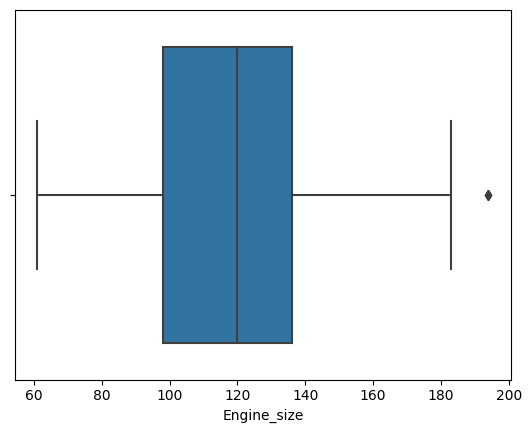

In [106]:
sns.boxplot(x=data.Engine_size)

### OUTLIERS FOR COMPRESSION_RATIO

<Axes: xlabel='Curb_weight', ylabel='Count'>

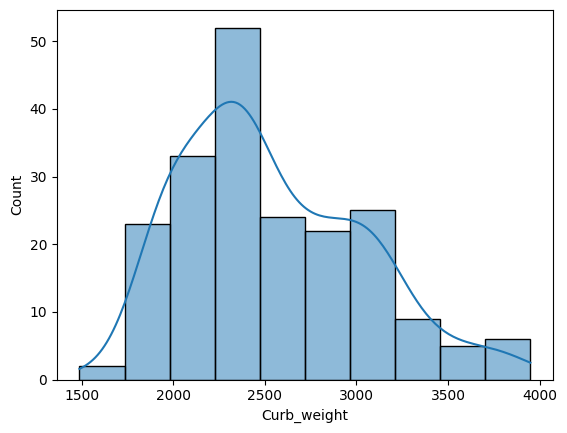

In [107]:
sns.histplot(data=data,x='Curb_weight',kde=True)

In [108]:
Q1=data["Compression_ratio"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["Compression_ratio"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 8.6
upper_quartile 9.4


In [109]:
IQR=Q3-Q1
IQR

0.8000000000000007

In [110]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 7.399999999999999
upper_limit is 10.600000000000001


In [111]:
data.loc[data["Compression_ratio"]>upper_limit]

symboling  Normalized_loss           Make Fuel_type Aspiration Doors  \
46           0            115.0         jaguar       gas        std   two   
60           0            115.0          mazda    diesel        std  four   
63           0            115.0          mazda    diesel        std  four   
64          -1             93.0  mercedes-benz    diesel      turbo  four   
65          -1             93.0  mercedes-benz    diesel      turbo  four   
66           0             93.0  mercedes-benz    diesel      turbo   two   
67          -1             93.0  mercedes-benz    diesel      turbo  four   
87           1            128.0         nissan    diesel        std   two   
105          0            161.0         peugot    diesel      turbo  four   
107          0            115.0         peugot    diesel      turbo  four   
109          0            161.0         peugot    diesel      turbo  four   
111          0            115.0         peugot    diesel      turbo  four   
113          0            161.0         peugot    diesel      turbo  four   
154          0             91.0         toyota    diesel        std  four   
155          0             91.0         toyota    diesel        std  four   
170         -1             65.0         toyota    diesel      turbo  four   
178          2            122.0     volkswagen    diesel        std   two   
180          2             94.0     volkswagen    diesel        std  four   
183          2             94.0     volkswagen    diesel      turbo  four   
188          0            115.0     volkswagen    diesel      turbo  four   
199         -1             95.0          volvo    diesel      turbo  four   

    Body_style Drive_wheels Engine_location  Wheel_base  ...  Engine_size  \
46       sedan          rwd           front       102.0  ...          120   
60       sedan          fwd           front        98.8  ...          122   
63       sedan          rwd           front       104.9  ...          134   
64       sedan          rwd           front       110.0  ...          183   
65       wagon          rwd           front       110.0  ...          183   
66     hardtop          rwd           front       106.7  ...          183   
67       sedan          rwd           front        97.0  ...          183   
87       sedan          fwd           front        94.5  ...          103   
105      sedan          rwd           front       107.9  ...          152   
107      wagon          rwd           front       114.2  ...          152   
109      sedan          rwd           front       107.9  ...          152   
111      wagon          rwd           front       114.2  ...          152   
113      sedan          rwd           front       107.9  ...          152   
154      sedan          fwd           front        95.7  ...          110   
155  hatchback          fwd           front        95.7  ...          110   
170      sedan          fwd           front       102.4  ...          110   
178      sedan          fwd           front        97.3  ...           97   
180      sedan          fwd           front        97.3  ...           97   
183      sedan          fwd           front        97.3  ...           97   
188      sedan          fwd           front       100.4  ...           97   
199      sedan          rwd           front       109.1  ...          145   

     Fuel_system  Bore  Stroke Compression_ratio Horsepower  Peak_rpm  \
46          mpfi  3.54    2.76              11.5      262.0    5000.0   
60           idi  3.39    3.39              22.7       64.0    4650.0   
63           idi  3.43    3.64              22.0       72.0    4200.0   
64           idi  3.58    3.64              21.5      123.0    4350.0   
65           idi  3.58    3.64              21.5      123.0    4350.0   
66           idi  3.58    3.64              21.5      123.0    4350.0   
67           idi  3.58    3.64              21.5      123.0    4350.0   
87           idi  2.99    3.47 

In [112]:
len(data.loc[data["Compression_ratio"]>upper_limit])/len(data)

0.1044776119402985

In [113]:
data.loc[data["Compression_ratio"]<lower_limit]

symboling  Normalized_loss        Make Fuel_type Aspiration Doors  \
28           3            145.0       dodge       gas      turbo   two   
79           3            115.0  mitsubishi       gas      turbo   two   
80           3            115.0  mitsubishi       gas      turbo   two   
81           3            115.0  mitsubishi       gas      turbo   two   
114          0            161.0      peugot       gas      turbo  four   
121          3            115.0    plymouth       gas      turbo   two   

    Body_style Drive_wheels Engine_location  Wheel_base  ...  Engine_size  \
28   hatchback          fwd           front        95.9  ...          156   
79   hatchback          fwd           front        95.9  ...          156   
80   hatchback          fwd           front        95.9  ...          156   
81   hatchback          fwd           front        95.9  ...          156   
114      sedan          rwd           front       108.0  ...          134   
121  hatchback          rwd           front        95.9  ...          156   

     Fuel_system  Bore  Stroke Compression_ratio Horsepower  Peak_rpm  \
28           mfi  3.60    3.90               7.0      145.0    5000.0   
79          spdi  3.58    3.86               7.0      145.0    5000.0   
80          spdi  3.59    3.86               7.0      145.0    5000.0   
81          spdi  3.59    3.86               7.0      145.0    5000.0   
114         mpfi  3.61    3.21               7.0      142.0    5600.0   
121         spdi  3.59    3.86               7.0      145.0    5000.0   

    City_mpg  Highway_mpg  price  
28        19           24  12964  
79        19           24  12629  
80        19           24  14869  
81        19           24  14489  
114       18           24  18150  
121       19           24  12764  

[6 rows x 26 columns]

In [114]:
len(data.loc[data["Compression_ratio"]<lower_limit])/len(data)

0.029850746268656716

In [115]:
data.loc[data["Compression_ratio"]<lower_limit,"Compression_ratio"]=data["Compression_ratio"].median()

In [116]:
data.loc[data["Compression_ratio"]>upper_limit,"Compression_ratio"]=data["Compression_ratio"].median()

<Axes: xlabel='Compression_ratio'>

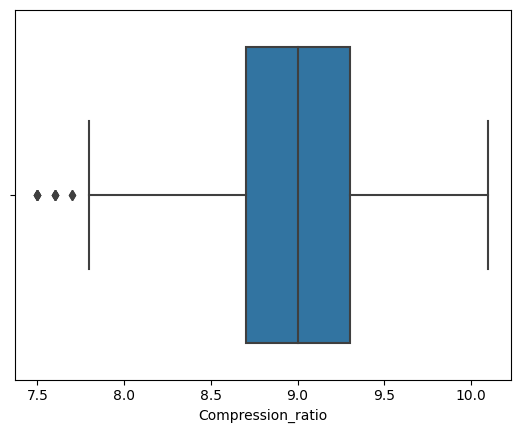

In [117]:
sns.boxplot(x=data.Compression_ratio)

### OUTLIERS FOR CITY_MPG

<Axes: xlabel='City_mpg', ylabel='Count'>

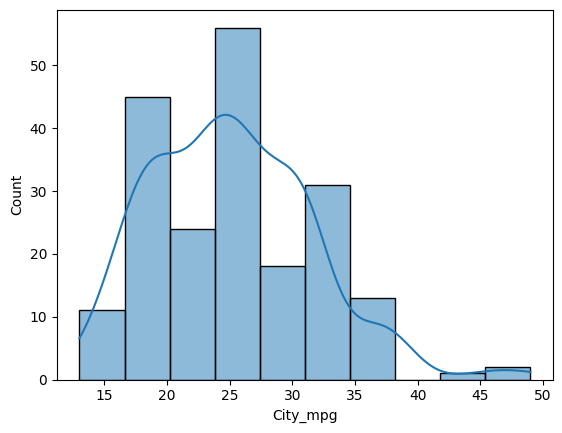

In [118]:
sns.histplot(data=data,x='City_mpg',kde=True)

In [119]:
Q1=data["City_mpg"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["City_mpg"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 19.0
upper_quartile 30.0


In [120]:
IQR=Q3-Q1
IQR

11.0

In [121]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 2.5
upper_limit is 46.5


In [122]:
data.loc[data["City_mpg"]>upper_limit]

symboling  Normalized_loss       Make Fuel_type Aspiration Doors  \
17          2            121.0  chevrolet       gas        std   two   
29          2            137.0      honda       gas        std   two   

   Body_style Drive_wheels Engine_location  Wheel_base  ...  Engine_size  \
17  hatchback          fwd           front        88.4  ...           61   
29  hatchback          fwd           front        86.6  ...           92   

    Fuel_system  Bore  Stroke Compression_ratio Horsepower  Peak_rpm City_mpg  \
17         2bbl  2.91    3.03               9.5       48.0    5100.0       47   
29         1bbl  2.91    3.41               9.6       58.0    4800.0       49   

    Highway_mpg  price  
17           53   5151  
29           54   6479  

[2 rows x 26 columns]

In [123]:
len(data.loc[data["City_mpg"]>upper_limit])/len(data)

0.009950248756218905

In [124]:
data.loc[data["City_mpg"]>upper_limit,"City_mpg"]=data["City_mpg"].median()

<Axes: xlabel='City_mpg'>

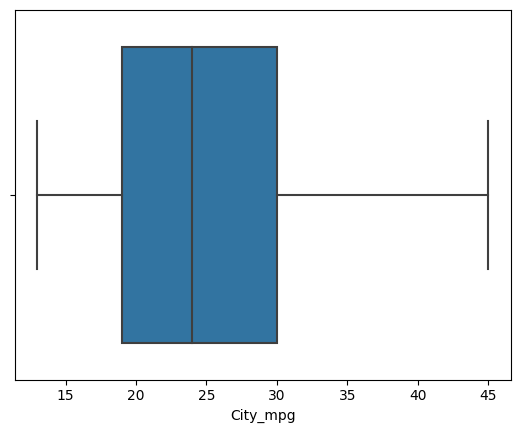

In [125]:
sns.boxplot(x=data.City_mpg)

### OUTLIERS FOR HIGHWAY_MPG

<Axes: xlabel='Highway_mpg', ylabel='Count'>

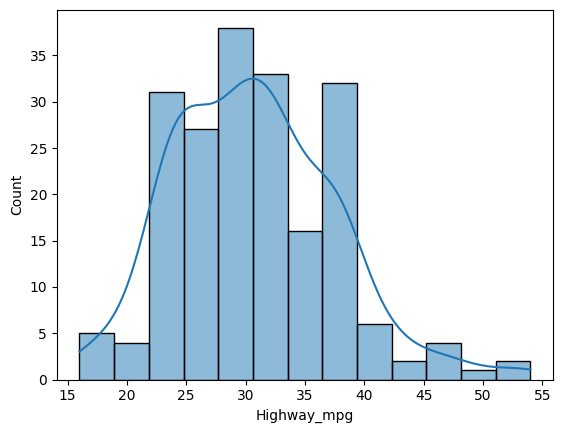

In [126]:
sns.histplot(data=data,x='Highway_mpg',kde=True)

In [127]:
Q1=data["Highway_mpg"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["Highway_mpg"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 25.0
upper_quartile 34.0


In [128]:
IQR=Q3-Q1
IQR

9.0

In [129]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 11.5
upper_limit is 47.5


In [130]:
data.loc[data["Highway_mpg"]>upper_limit]

symboling  Normalized_loss       Make Fuel_type Aspiration Doors  \
17          2            121.0  chevrolet       gas        std   two   
29          2            137.0      honda       gas        std   two   
87          1            128.0     nissan    diesel        std   two   

   Body_style Drive_wheels Engine_location  Wheel_base  ...  Engine_size  \
17  hatchback          fwd           front        88.4  ...           61   
29  hatchback          fwd           front        86.6  ...           92   
87      sedan          fwd           front        94.5  ...          103   

    Fuel_system  Bore  Stroke Compression_ratio Horsepower  Peak_rpm City_mpg  \
17         2bbl  2.91    3.03               9.5       48.0    5100.0       24   
29         1bbl  2.91    3.41               9.6       58.0    4800.0       24   
87          idi  2.99    3.47               9.0       55.0    4800.0       45   

    Highway_mpg  price  
17           53   5151  
29           54   6479  
87           50   7099  

[3 rows x 26 columns]

In [131]:
len(data.loc[data["Highway_mpg"]>upper_limit])/len(data)

0.014925373134328358

In [132]:
data.loc[data["Highway_mpg"]>upper_limit,"Highway_mpg"]=data["Highway_mpg"].median()

<Axes: >

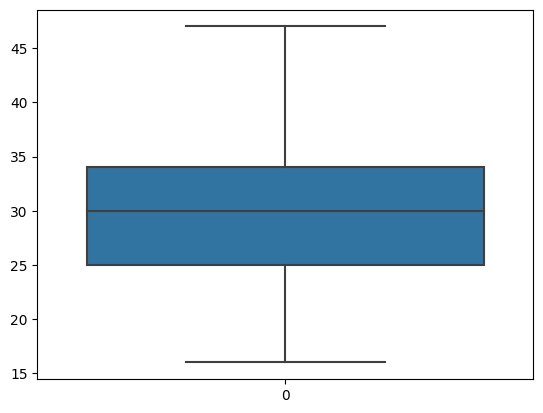

In [133]:
sns.boxplot(data.Highway_mpg)

### OUTLIERS FOR STROKE

<Axes: xlabel='Stroke', ylabel='Count'>

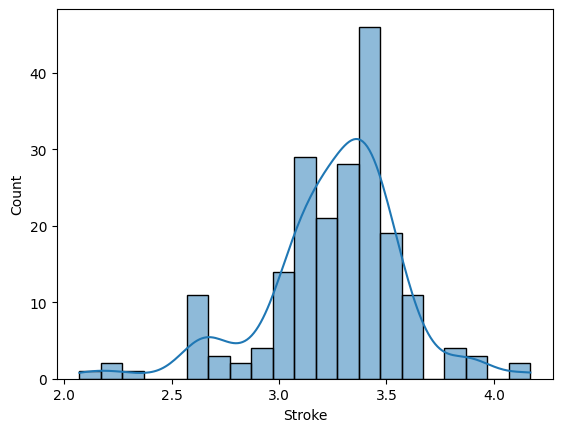

In [134]:
sns.histplot(data=data,x='Stroke',kde=True)

In [135]:
Q1=data["Stroke"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["Stroke"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 3.11
upper_quartile 3.41


In [136]:
IQR=Q3-Q1
IQR

0.30000000000000027

In [137]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 2.6599999999999993
upper_limit is 3.8600000000000003


In [138]:
data.loc[data["Stroke"]>upper_limit]

symboling  Normalized_loss     Make Fuel_type Aspiration Doors  \
28           3            145.0    dodge       gas      turbo   two   
44           0            145.0   jaguar       gas        std  four   
45           0            115.0   jaguar       gas        std  four   
126          0            115.0  renault       gas        std  four   
127          2            115.0  renault       gas        std   two   

    Body_style Drive_wheels Engine_location  Wheel_base  ...  Engine_size  \
28   hatchback          fwd           front        95.9  ...          156   
44       sedan          rwd           front       113.0  ...          120   
45       sedan          rwd           front       113.0  ...          120   
126      wagon          fwd           front        96.1  ...          132   
127  hatchback          fwd           front        96.1  ...          132   

     Fuel_system  Bore  Stroke Compression_ratio Horsepower  Peak_rpm  \
28           mfi  3.60    3.90               9.0      145.0    5000.0   
44          mpfi  3.63    4.17               8.1      176.0    4750.0   
45          mpfi  3.63    4.17               8.1      176.0    4750.0   
126         mpfi  3.46    3.90               8.7       95.0    5200.0   
127         mpfi  3.46    3.90               8.7       95.0    5200.0   

    City_mpg  Highway_mpg  price  
28        19           24  12964  
44        15           19  32250  
45        15           19  35550  
126       23           31   9295  
127       23           31   9895  

[5 rows x 26 columns]

In [139]:
len(data.loc[data["Stroke"]>upper_limit])/len(data)

0.024875621890547265

In [140]:
data.loc[data["Stroke"]<lower_limit]

symboling  Normalized_loss    Make Fuel_type Aspiration Doors Body_style  \
108          0            161.0  peugot       gas        std  four      sedan   
110          0            115.0  peugot       gas        std  four      wagon   
130          3            150.0    saab       gas        std   two  hatchback   
134          2             83.0  subaru       gas        std   two  hatchback   
135          2             83.0  subaru       gas        std   two  hatchback   
136          2             83.0  subaru       gas        std   two  hatchback   
137          0            102.0  subaru       gas        std  four      sedan   
138          0            102.0  subaru       gas        std  four      sedan   
139          0            102.0  subaru       gas        std  four      sedan   
140          0            102.0  subaru       gas        std  four      sedan   
141          0            102.0  subaru       gas      turbo  four      sedan   
142          0             89.0  subaru       gas        std  four      wagon   
143          0             89.0  subaru       gas        std  four      wagon   
144          0             85.0  subaru       gas        std  four      wagon   
145          0             85.0  subaru       gas      turbo  four      wagon   

    Drive_wheels Engine_location  Wheel_base  ...  Engine_size  Fuel_system  \
108          rwd           front       107.9  ...          120         mpfi   
110          rwd           front       114.2  ...          120         mpfi   
130          fwd           front        99.1  ...          121         mpfi   
134          fwd           front        93.7  ...           97         2bbl   
135          fwd           front        93.7  ...          108         2bbl   
136          4wd           front        93.3  ...          108         2bbl   
137          fwd           front        97.2  ...          108         2bbl   
138          fwd           front        97.2  ...          108         2bbl   
139          fwd           front        97.2  ...          108         mpfi   
140          4wd           front        97.0  ...          108         2bbl   
141          4wd           front        97.0  ...          108         mpfi   
142          fwd           front        97.0  ...          108         2bbl   
143          fwd           front        97.0  ...          108         mpfi   
144          4wd           front        96.9  ...          108         2bbl   
145          4wd           front        96.9  ...          108         mpfi   

     Bore  Stroke Compression_ratio Horsepower  Peak_rpm City_mpg  \
108  3.46    2.19               8.4       95.0    5000.0       19   
110  3.46    2.19               8.4       95.0    5000.0       19   
130  2.54    2.07               9.3      110.0    5250.0       21   
134  3.62    2.36               9.0       69.0    4900.0       31   
135  3.62    2.64               8.7       73.0    4400.0       26   
136  3.62    2.64               8.7       73.0    4400.0       26   
137  3.62    2.64               9.5       82.0    4800.0       32   
138  3.62    2.64               9.5       82.0    4400.0       28   
139  3.62    2.64               9.0       94.0    5200.0       26   
140  3.62    2.64               9.0       82.0    4800.0       24   
141  3.62    2.64               7.7      111.0    4800.0       24   
142  3.62    2.64               9.0       82.0    4800.0       28   
143  3.62    2.64               9.0       94.0    5200.0       25   
144  3.62    2.64               9.0       82.0    4800.0       23   
145  3.62    2.64               7.7      111.0    4800.0       23   

     Highway_mpg  price  
108           24  15580  
110           24  16695  
130           28  15040  
134           36   5118  
135           31   7053  
136           31   7603  
137           37   7126  
138           33   7775  
139           32   9960  
140           25   9233  
141           29  11259  
142           32   7463  


In [141]:
len(data.loc[data["Stroke"]<lower_limit])/len(data)

0.07462686567164178

In [142]:
data.loc[data["Stroke"]>upper_limit,"Stroke"]=data["Stroke"].median()

In [143]:
data.loc[data["Stroke"]<lower_limit,"Stroke"]=data["Stroke"].median()

<Axes: xlabel='Stroke'>

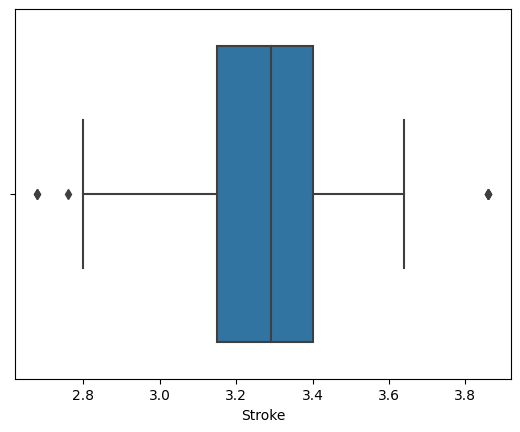

In [144]:
sns.boxplot(x=data.Stroke)

### OUTLIERS FOR HORSEPOWER

<Axes: xlabel='Horsepower', ylabel='Count'>

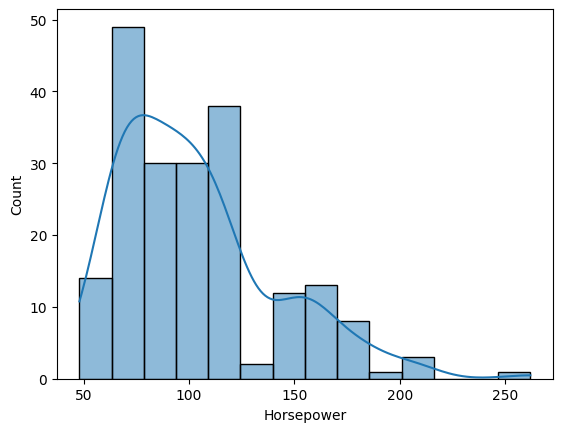

In [145]:
sns.histplot(data=data,x='Horsepower',kde=True)

In [146]:
Q1=data["Horsepower"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["Horsepower"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 70.0
upper_quartile 116.0


In [147]:
IQR=Q3-Q1
IQR

46.0

In [148]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 1.0
upper_limit is 185.0


In [149]:
data.loc[data["Horsepower"]>upper_limit]

symboling  Normalized_loss     Make Fuel_type Aspiration Doors  \
46           0            115.0   jaguar       gas        std   two   
102          3            115.0   nissan       gas      turbo   two   
123          3            115.0  porsche       gas        std   two   
124          3            115.0  porsche       gas        std   two   
125          3            115.0  porsche       gas        std   two   

      Body_style Drive_wheels Engine_location  Wheel_base  ...  Engine_size  \
46         sedan          rwd           front       102.0  ...          120   
102    hatchback          rwd           front        91.3  ...          181   
123      hardtop          rwd            rear        89.5  ...          194   
124      hardtop          rwd            rear        89.5  ...          194   
125  convertible          rwd            rear        89.5  ...          194   

     Fuel_system  Bore  Stroke Compression_ratio Horsepower  Peak_rpm  \
46          mpfi  3.54    2.76               9.0      262.0    5000.0   
102         mpfi  3.43    3.27               7.8      200.0    5200.0   
123         mpfi  3.74    2.90               9.5      207.0    5900.0   
124         mpfi  3.74    2.90               9.5      207.0    5900.0   
125         mpfi  3.74    2.90               9.5      207.0    5900.0   

    City_mpg  Highway_mpg  price  
46        13           17  36000  
102       17           23  19699  
123       17           25  32528  
124       17           25  34028  
125       17           25  37028  

[5 rows x 26 columns]

In [150]:
len(data.loc[data["Horsepower"]>upper_limit])/len(data)

0.024875621890547265

In [151]:
data.loc[data["Horsepower"]<lower_limit]

Empty DataFrame
Columns: [symboling, Normalized_loss, Make, Fuel_type, Aspiration, Doors, Body_style, Drive_wheels, Engine_location, Wheel_base, Length, Width, Height, Curb_weight, Engine_type, Cylinders, Engine_size, Fuel_system, Bore, Stroke, Compression_ratio, Horsepower, Peak_rpm, City_mpg, Highway_mpg, price]
Index: []

[0 rows x 26 columns]

In [152]:
data.loc[data["Horsepower"]>upper_limit,"Horsepower"]=data["Horsepower"].median()

<Axes: xlabel='Horsepower'>

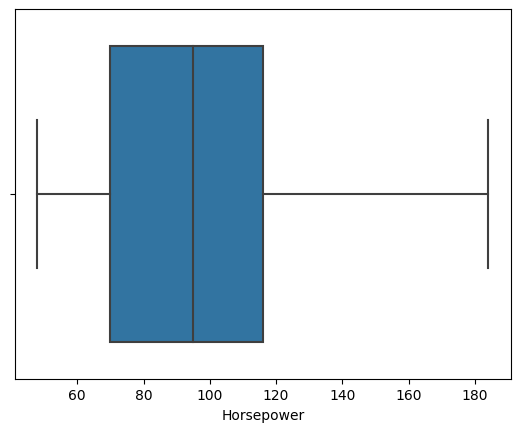

In [153]:
sns.boxplot(x=data.Horsepower)

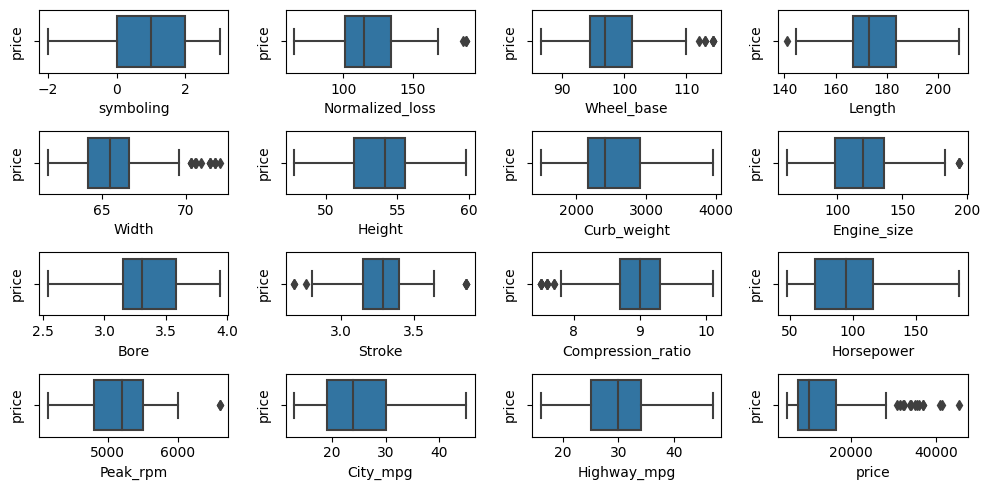

In [154]:
plt.figure(figsize=(10,5),facecolor="white")
plotnumber=1

for column in data1:
  if plotnumber<17:
    ax=plt.subplot(4,4,plotnumber)
    sns.boxplot(x=data[column])
    plt.xlabel(column,fontsize=10)
    plt.ylabel("price",fontsize=10)
  plotnumber+=1
plt.tight_layout()

# **Feature Engineering**

In [155]:
data2

Index(['make', 'fuel-type', 'aspiaration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cyilnders',
       'fuel-system'],
      dtype='object')

## **- Feature Encoding**

* Coverting Categorical Column into Numerical Column

### **For Make Column**

In [156]:
Make= {
    'toyota': 0,
    'nissan': 1,
    'mazda': 2,
    'mitsubishi': 3,
    'honda': 4,
    'volkswagen': 5,
    'subaru': 6,
    'peugot': 7,
    'volvo': 8,
    'dodge': 9,
    'mercedes-benz': 10,
    'bmw': 11,
    'plymouth': 12,
    'audi': 13,
    'saab': 14,
    'porsche': 15,
    'jaguar': 16,
    'chevrolet': 17,
    'alfa-romero': 18,
    'isuzu': 19,
    'renault': 19,  # Assign the same label as 'isuzu'
    'mercury': 21
}

# Apply Manual encoding to 'make' column
data['Make'] = data['Make'].map(Make)

In [157]:
data.head(2)

symboling  Normalized_loss  Make Fuel_type Aspiration Doors   Body_style  \
0          3            115.0    18       gas        std   two  convertible   
1          3            115.0    18       gas        std   two  convertible   

  Drive_wheels Engine_location  Wheel_base  ...  Engine_size  Fuel_system  \
0          rwd           front        88.6  ...          130         mpfi   
1          rwd           front        88.6  ...          130         mpfi   

   Bore  Stroke Compression_ratio Horsepower  Peak_rpm City_mpg  Highway_mpg  \
0  3.47    2.68               9.0      111.0    5000.0       21           27   
1  3.47    2.68               9.0      111.0    5000.0       21           27   

   price  
0  13495  
1  16500  

[2 rows x 26 columns]

## **For Fuel_type**

In [158]:
data.Fuel_type.unique()
data.Fuel_type.value_counts()

gas       181
diesel     20
Name: Fuel_type, dtype: int64

In [159]:
# In this case, For encoding we use get-dummies

data = pd.get_dummies(data, columns=['Fuel_type'], prefix=['Fuel'], drop_first=True)

In [160]:
data.sample(5)

symboling  Normalized_loss  Make Aspiration Doors   Body_style  \
118          1            154.0    12        std  four        sedan   
85          -1            137.0     3        std  four        sedan   
79           3            115.0     3      turbo   two    hatchback   
145          0             85.0     6      turbo  four        wagon   
185          3            115.0     5        std   two  convertible   

    Drive_wheels Engine_location  Wheel_base  Length  ...  Fuel_system  Bore  \
118          fwd           front        93.7   167.3  ...         2bbl  2.97   
85           fwd           front        96.3   172.4  ...         spdi  3.17   
79           fwd           front        95.9   173.2  ...         spdi  3.58   
145          4wd           front        96.9   173.6  ...         mpfi  3.62   
185          fwd           front        94.5   159.3  ...         mpfi  3.19   

     Stroke Compression_ratio Horsepower  Peak_rpm City_mpg  Highway_mpg  \
118    3.23               9.4       68.0    5500.0       31           38   
85     3.46               7.5      116.0    5500.0       23           30   
79     3.86               9.0      145.0    5000.0       19           24   
145    3.29               7.7      111.0    4800.0       23           23   
185    3.40               8.5       90.0    5500.0       24           29   

     price  Fuel_gas  
118   6692         1  
85    9279         1  
79   12629         1  
145  11694         1  
185  11595         1  

[5 rows x 26 columns]

In [161]:
data.columns

Index(['symboling', 'Normalized_loss', 'Make', 'Aspiration', 'Doors',
       'Body_style', 'Drive_wheels', 'Engine_location', 'Wheel_base', 'Length',
       'Width', 'Height', 'Curb_weight', 'Engine_type', 'Cylinders',
       'Engine_size', 'Fuel_system', 'Bore', 'Stroke', 'Compression_ratio',
       'Horsepower', 'Peak_rpm', 'City_mpg', 'Highway_mpg', 'price',
       'Fuel_gas'],
      dtype='object')

### **For Aspiration Column**

In [162]:
data.Aspiration.unique()
data.Aspiration.value_counts()

std      165
turbo     36
Name: Aspiration, dtype: int64

In [163]:
# In this case, For encoding we use get-dummies

data = pd.get_dummies(data, columns=['Aspiration'], prefix=['Aspiration'], drop_first=True)

In [164]:
data.sample(5)

symboling  Normalized_loss  Make Doors Body_style Drive_wheels  \
65          -1             93.0    10  four      wagon          rwd   
92           1            128.0     1   two  hatchback          fwd   
85          -1            137.0     3  four      sedan          fwd   
57           0            115.0     2  four      sedan          fwd   
169         -1             65.0     0  four      sedan          fwd   

    Engine_location  Wheel_base  Length  Width  ...  Bore  Stroke  \
65            front       110.0   190.9   70.3  ...  3.58    3.64   
92            front        94.5   165.6   63.8  ...  3.15    3.29   
85            front        96.3   172.4   65.4  ...  3.17    3.46   
57            front        98.8   177.8   66.5  ...  3.39    3.39   
169           front       102.4   175.6   66.5  ...  3.31    3.54   

    Compression_ratio Horsepower  Peak_rpm City_mpg  Highway_mpg  price  \
65                9.0      123.0    4350.0       22           25  28248   
92                9.4       69.0    5200.0       31           37   7799   
85                7.5      116.0    5500.0       23           30   9279   
57                8.6       84.0    4800.0       26           32   8495   
169               8.7       92.0    4200.0       29           34   8948   

     Fuel_gas  Aspiration_turbo  
65          0                 1  
92          1                 0  
85          1                 0  
57          1                 0  
169         1                 0  

[5 rows x 26 columns]

### **For Doors Column**

In [165]:
data.Doors.unique()
data.Doors.value_counts()

four    115
two      86
Name: Doors, dtype: int64

In [166]:
# In this case, For encoding we use get-dummies

data = pd.get_dummies(data, columns=['Doors'], prefix=['Doors'], drop_first=True)

In [167]:
data.sample(5)

symboling  Normalized_loss  Make Body_style Drive_wheels Engine_location  \
101          3            115.0     1  hatchback          rwd           front   
55           3            150.0     2  hatchback          rwd           front   
16           0            115.0    11      sedan          rwd           front   
48           1            104.0     2  hatchback          fwd           front   
88           1            128.0     1      sedan          fwd           front   

     Wheel_base  Length  Width  Height  ...  Stroke Compression_ratio  \
101        91.3   170.7   67.9    49.7  ...    3.27               9.0   
55         95.3   169.0   65.7    49.6  ...    3.29               9.4   
16        110.0   197.0   70.9    56.3  ...    3.39               8.0   
48         93.1   159.1   64.2    54.1  ...    3.15               9.0   
88         94.5   165.3   63.8    54.5  ...    3.29               9.4   

    Horsepower  Peak_rpm City_mpg  Highway_mpg  price  Fuel_gas  \
101      160.0    5200.0       19           25  17199         1   
55       135.0    6000.0       16           23  15645         1   
16       182.0    5400.0       15           20  36880         1   
48        68.0    5000.0       31           38   6095         1   
88        69.0    5200.0       31           37   6649         1   

     Aspiration_turbo  Doors_two  
101                 0          1  
55                  0          1  
16                  0          0  
48                  0          1  
88                  0          1  

[5 rows x 26 columns]

### **For body_style Column**

In [168]:
#body_style
data.Body_style.unique()
data.Body_style.value_counts()

sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: Body_style, dtype: int64

In [169]:
Body_style = {
    'sedan': 0,
    'hatchback': 1,
    'wagon': 2,
    'hardtop': 3,
    'convertible': 4
}

# Apply manual encoding to 'body-style' column
data['Body_style'] = data['Body_style'].map(Body_style)
data.head(2)

symboling  Normalized_loss  Make  Body_style Drive_wheels Engine_location  \
0          3            115.0    18           4          rwd           front   
1          3            115.0    18           4          rwd           front   

   Wheel_base  Length  Width  Height  ...  Stroke Compression_ratio  \
0        88.6   168.8   64.1    48.8  ...    2.68               9.0   
1        88.6   168.8   64.1    48.8  ...    2.68               9.0   

  Horsepower  Peak_rpm City_mpg  Highway_mpg  price  Fuel_gas  \
0      111.0    5000.0       21           27  13495         1   
1      111.0    5000.0       21           27  16500         1   

   Aspiration_turbo  Doors_two  
0                 0          1  
1                 0          1  

[2 rows x 26 columns]

### **For drive_wheels Column**

In [170]:
data.Drive_wheels.unique()
data.Drive_wheels.value_counts()

fwd    118
rwd     75
4wd      8
Name: Drive_wheels, dtype: int64

In [171]:
Drive_wheels= {
    'fwd': 1,
    'rwd': 2,
    '4wd': 3
}

# Apply manual encoding to 'drive-wheels' column
data['Drive_wheels'] = data['Drive_wheels'].map(Drive_wheels)
data.head()

symboling  Normalized_loss  Make  Body_style  Drive_wheels Engine_location  \
0          3            115.0    18           4             2           front   
1          3            115.0    18           4             2           front   
2          1            115.0    18           1             2           front   
3          2            164.0    13           0             1           front   
4          2            164.0    13           0             3           front   

   Wheel_base  Length  Width  Height  ...  Stroke Compression_ratio  \
0        88.6   168.8   64.1    48.8  ...    2.68               9.0   
1        88.6   168.8   64.1    48.8  ...    2.68               9.0   
2        94.5   171.2   65.5    52.4  ...    3.47               9.0   
3        99.8   176.6   66.2    54.3  ...    3.40              10.0   
4        99.4   176.6   66.4    54.3  ...    3.40               8.0   

  Horsepower  Peak_rpm City_mpg  Highway_mpg  price  Fuel_gas  \
0      111.0    5000.0       21           27  13495         1   
1      111.0    5000.0       21           27  16500         1   
2      154.0    5000.0       19           26  16500         1   
3      102.0    5500.0       24           30  13950         1   
4      115.0    5500.0       18           22  17450         1   

   Aspiration_turbo  Doors_two  
0                 0          1  
1                 0          1  
2                 0          1  
3                 0          0  
4                 0          0  

[5 rows x 26 columns]

### **For engine_location Column**

In [172]:
##engine_location
data.Engine_location.unique()
data.Engine_location.value_counts()

front    198
rear       3
Name: Engine_location, dtype: int64

In [173]:
# In this case, For encoding we use get-dummies

data = pd.get_dummies(data, columns=['Engine_location'], prefix=['Engine_location'])

In [174]:
data.sample(5)

symboling  Normalized_loss  Make  Body_style  Drive_wheels  Wheel_base  \
38           0             85.0     4           0             1        96.5   
153          0             91.0     0           1             1        95.7   
82           1            125.0     3           0             1        96.3   
29           2            137.0     4           1             1        86.6   
137          0            102.0     6           0             1        97.2   

     Length  Width  Height  Curb_weight  ... Horsepower Peak_rpm  City_mpg  \
38    175.4   65.2    54.1         2304  ...       86.0   5800.0        27   
153   166.3   64.4    52.8         2109  ...       70.0   4800.0        30   
82    172.4   65.4    51.6         2365  ...       88.0   5000.0        25   
29    144.6   63.9    50.8         1713  ...       58.0   4800.0        24   
137   172.0   65.4    52.5         2145  ...       82.0   4800.0        32   

    Highway_mpg  price  Fuel_gas  Aspiration_turbo  Doors_two  \
38           33   8845         1                 0          0   
153          37   7198         1                 0          0   
82           32   6989         1                 0          0   
29           30   6479         1                 0          1   
137          37   7126         1                 0          0   

     Engine_location_front  Engine_location_rear  
38                       1                     0  
153                      1                     0  
82                       1                     0  
29                       1                     0  
137                      1                     0  

[5 rows x 27 columns]

### **For fuel_system Column**

In [175]:
#fuel_system
data.Fuel_system.unique()
data.Fuel_system.value_counts()

mpfi    92
2bbl    64
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: Fuel_system, dtype: int64

In [176]:
Fuel_system= {
    'mpfi': 0,
    '2bbl': 1,
    'idi': 2,
    '1bbl': 3,
    'spdi': 4,
    '4bbl': 5,
    'mfi': 6,
    'spfi': 7
}

# Apply manual encoding to 'fuel-system' column
data['Fuel_system'] = data['Fuel_system'].map(Fuel_system)
data.head(5)

symboling  Normalized_loss  Make  Body_style  Drive_wheels  Wheel_base  \
0          3            115.0    18           4             2        88.6   
1          3            115.0    18           4             2        88.6   
2          1            115.0    18           1             2        94.5   
3          2            164.0    13           0             1        99.8   
4          2            164.0    13           0             3        99.4   

   Length  Width  Height  Curb_weight  ... Horsepower Peak_rpm  City_mpg  \
0   168.8   64.1    48.8         2548  ...      111.0   5000.0        21   
1   168.8   64.1    48.8         2548  ...      111.0   5000.0        21   
2   171.2   65.5    52.4         2823  ...      154.0   5000.0        19   
3   176.6   66.2    54.3         2337  ...      102.0   5500.0        24   
4   176.6   66.4    54.3         2824  ...      115.0   5500.0        18   

   Highway_mpg  price  Fuel_gas  Aspiration_turbo  Doors_two  \
0           27  13495         1                 0          1   
1           27  16500         1                 0          1   
2           26  16500         1                 0          1   
3           30  13950         1                 0          0   
4           22  17450         1                 0          0   

   Engine_location_front  Engine_location_rear  
0                      1                     0  
1                      1                     0  
2                      1                     0  
3                      1                     0  
4                      1                     0  

[5 rows x 27 columns]

### **For Cylinders column**

In [177]:
data.Cylinders.unique()
data.Cylinders.value_counts()

four      157
six        24
five       10
two         4
eight       4
three       1
twelve      1
Name: Cylinders, dtype: int64

In [178]:
data.Cylinders=data.Cylinders.map({"twelve":0,"three":1,"eight":2,"two":3,"five":4,"six":5,"four":6})

In [179]:
data.head()

symboling  Normalized_loss  Make  Body_style  Drive_wheels  Wheel_base  \
0          3            115.0    18           4             2        88.6   
1          3            115.0    18           4             2        88.6   
2          1            115.0    18           1             2        94.5   
3          2            164.0    13           0             1        99.8   
4          2            164.0    13           0             3        99.4   

   Length  Width  Height  Curb_weight  ... Horsepower  Peak_rpm  City_mpg  \
0   168.8   64.1    48.8         2548  ...      111.0    5000.0        21   
1   168.8   64.1    48.8         2548  ...      111.0    5000.0        21   
2   171.2   65.5    52.4         2823  ...      154.0    5000.0        19   
3   176.6   66.2    54.3         2337  ...      102.0    5500.0        24   
4   176.6   66.4    54.3         2824  ...      115.0    5500.0        18   

   Highway_mpg  price  Fuel_gas  Aspiration_turbo  Doors_two  \
0           27  13495         1                 0          1   
1           27  16500         1                 0          1   
2           26  16500         1                 0          1   
3           30  13950         1                 0          0   
4           22  17450         1                 0          0   

   Engine_location_front  Engine_location_rear  
0                      1                     0  
1                      1                     0  
2                      1                     0  
3                      1                     0  
4                      1                     0  

[5 rows x 27 columns]

In [180]:
data.Engine_type.unique()
data.Engine_type.value_counts()

ohc      145
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
Name: Engine_type, dtype: int64

In [181]:
data.Engine_type=data.Engine_type.map({"ohc":0,"ohcf":1,"ohcv":2,"dohc":3,"l":4,"rotor":5})

# **- Train_Test_Split**

In [182]:
## Split data into x and y
x = data.drop('price', axis=1)
y = data.price

In [183]:
## training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## **- Feature Selection**

In [184]:
x_train.corr()

symboling  Normalized_loss      Make  Body_style  \
symboling               1.000000         0.314061  0.102782    0.254993   
Normalized_loss         0.314061         1.000000  0.147805   -0.168987   
Make                    0.102782         0.147805  1.000000    0.013389   
Body_style              0.254993        -0.168987  0.013389    1.000000   
Drive_wheels           -0.125987         0.127322  0.170038    0.160985   
Wheel_base             -0.540722         0.014845  0.153361   -0.100462   
Length                 -0.372493         0.046481  0.251111   -0.060086   
Width                  -0.209729         0.084575  0.283915   -0.080526   
Height                 -0.544300        -0.294524 -0.014464   -0.033839   
Curb_weight            -0.238976         0.038157  0.263429    0.084572   
Engine_type             0.082270         0.273334  0.074495    0.135607   
Cylinders              -0.100347        -0.169131 -0.250990    0.018820   
Engine_size            -0.104937         0.034055  0.168423    0.092166   
Fuel_system             0.223943         0.066370 -0.116439   -0.031877   
Bore                   -0.186551        -0.103634  0.151329    0.130123   
Stroke                  0.008719         0.007400 -0.209050   -0.122682   
Compression_ratio       0.163260         0.007220 -0.145760    0.031836   
Horsepower             -0.047432         0.088263  0.299419    0.040659   
Peak_rpm                0.236752         0.109556  0.023056    0.017143   
City_mpg               -0.072174        -0.166504 -0.423229   -0.126965   
Highway_mpg            -0.006743        -0.146082 -0.387961   -0.132916   
Fuel_gas                0.185002        -0.017517  0.064702    0.142564   
Aspiration_turbo       -0.033951         0.040384  0.176887   -0.081641   
Doors_two               0.618502         0.220394 -0.028906    0.314098   
Engine_location_front  -0.155279         0.005471 -0.141465   -0.188499   
Engine_location_rear    0.155279        -0.005471  0.141465    0.188499   

                       Drive_wheels  Wheel_base    Length     Width    Height  \
symboling                 -0.125987   -0.540722 -0.372493 -0.209729 -0.544300   
Normalized_loss            0.127322    0.014845  0.046481  0.084575 -0.294524   
Make                       0.170038    0.153361  0.251111  0.283915 -0.014464   
Body_style                 0.160985   -0.100462 -0.060086 -0.080526 -0.033839   
Drive_wheels               1.000000    0.331374  0.384046  0.299719  0.106052   
Wheel_base                 0.331374    1.000000  0.828844  0.742180  0.594215   
Length                     0.384046    0.828844  1.000000  0.823718  0.462003   
Width                      0.299719    0.742180  0.823718  1.000000  0.282412   
Height                     0.106052    0.594215  0.462003  0.282412  1.000000   
Curb_weight                0.556040    0.696361  0.855020  0.799923  0.301977   
Engine_type                0.398923    0.282856  0.294752  0.326879 -0.008947   
Cylinders                 -0.213909   -0.104764 -0.233154 -0.485710  0.152300   
Engine_size                0.365123    0.446550  0.583626  0.529619  0.118623   
Fuel_system               -0.153468   -0.198774 -0.292331 -0.199512 -0.293771   
Bore                       0.526361    0.485831  0.596459  0.507843  0.177515   
Stroke                    -0.165366    0.207734  0.104237  0.167482  0.073168   
Compression_ratio         -0.184871   -0.216891 -0.232319 -0.261832 -0.090886   
Horsepower                 0.386200    0.413753  0.616060  0.592622  0.018298   
Peak_rpm                  -0.214380   -0.346909 -0.303124 -0.241483 -0.292255   
City_mpg                  -0.468321   -0.385497 -0.596973 -0.615172  0.012457   
Highway_mpg               -0.518138   -0.446946 -0.634107 -0.651817 -0.058918   
Fuel_gas                  -0.079587   -0.339185 -0.198188 -0.206395 -0.236852   
Aspiration_turbo           0.182277    0.286792  0.234448  0.328390  0.042100   
Doors_two                 -0.021893   -0.476104 -0.45

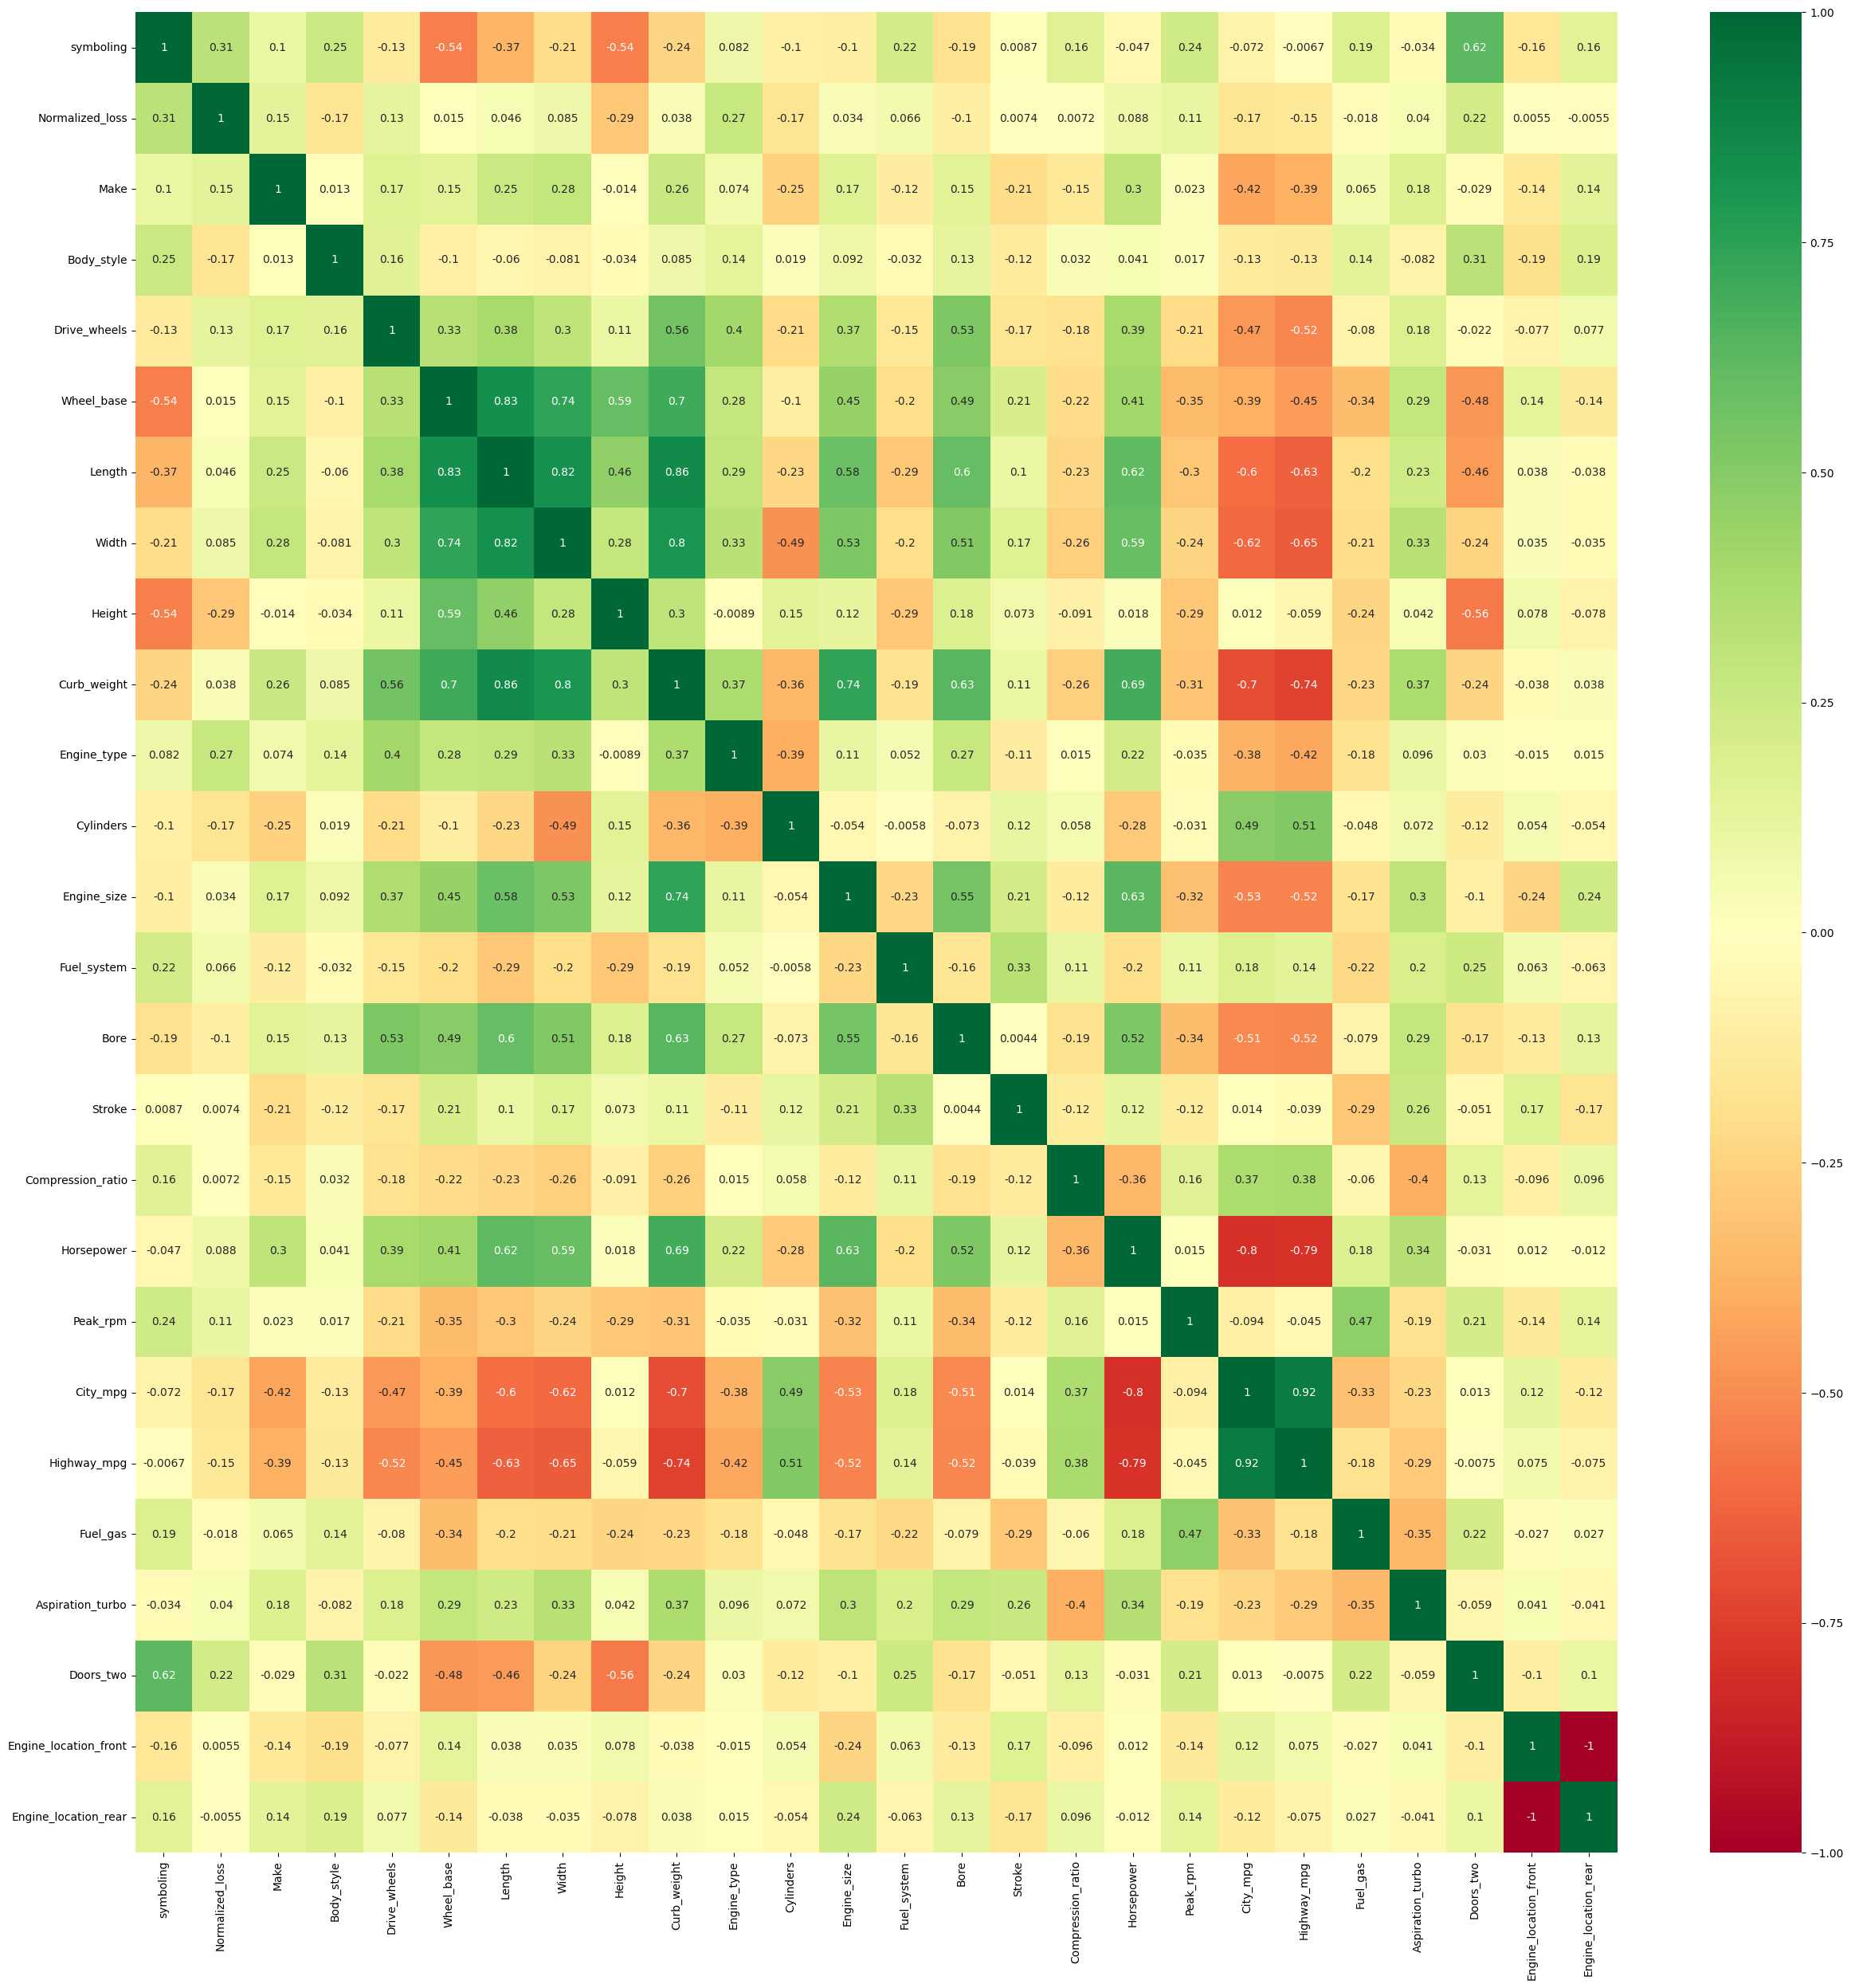

In [185]:
#Using Pearson Correlation
plt.figure(figsize=(30,30))
cor = x_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.RdYlGn)
plt.show()

In [186]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [187]:
corr_features = correlation(x_train, 0.7)
len(set(corr_features))

5

In [188]:
corr_features

{'Curb_weight', 'Engine_size', 'Highway_mpg', 'Length', 'Width'}

In [189]:
x_train.drop(corr_features,axis=1)
x_test.drop(corr_features,axis=1)

symboling  Normalized_loss  Make  Body_style  Drive_wheels  Wheel_base  \
95           2            168.0     1           3             1        95.1   
15           0            115.0    11           0             2       103.5   
30           2            137.0     4           1             1        86.6   
158          0             91.0     0           0             1        95.7   
128          3            150.0    14           1             1        99.1   
..         ...              ...   ...         ...           ...         ...   
140          0            102.0     6           0             3        97.0   
98           0            128.0     1           0             1       100.4   
173         -1             65.0     0           1             1       102.4   
96           0            106.0     1           1             1        97.2   
170         -1             65.0     0           0             1       102.4   

     Height  Engine_type  Cylinders  Fuel_system  ...  Stroke  \
95     53.3            0          6            1  ...    3.29   
15     53.7            0          5            0  ...    3.39   
30     50.8            0          6            3  ...    3.41   
158    52.8            0          6            1  ...    3.03   
128    56.1            0          6            0  ...    3.07   
..      ...          ...        ...          ...  ...     ...   
140    54.3            1          6            1  ...    3.29   
98     55.1            2          5            0  ...    3.27   
173    53.9            0          6            0  ...    3.54   
96     54.7            0          6            1  ...    3.47   
170    54.9            0          6            2  ...    3.35   

     Compression_ratio  Horsepower  Peak_rpm  City_mpg  Fuel_gas  \
95                9.40        69.0    5200.0        31         1   
15                8.00       182.0    5400.0        16         1   
30                9.20        76.0    6000.0        31         1   
158               9.00        70.0    4800.0        28         1   
128               9.31       110.0    5250.0        21         1   
..                 ...         ...       ...       ...       ...   
140               9.00        82.0    4800.0        24         1   
98                9.00       152.0    5200.0        17         1   
173               8.70        92.0    4200.0        27         1   
96                8.50        97.0    5200.0        27         1   
170               9.00        73.0    4500.0        30         0   

     Aspiration_turbo  Doors_two  Engine_location_front  Engine_location_rear  
95                  0          1                      1                     0  
15                  0          1                      1                     0  
30                  0          1                      1                     0  
158                 0          0                      1                     0  
128                 0          1                      1                     0  
..                ...        ...                    ...                   ...  
140                 0          0                      1                     0  
98                  0          0                      1                     0  
173                 0          0                      1                     0  
96                  0          0                      1                     0  
170                 1          0                      1                     0  

[61 rows x 21 columns]

## Model Building

In [190]:
!!pip install catboost

['Requirement already satisfied: catboost in /usr/local/lib/python3.10/dist-packages (1.2)',
 'Requirement already satisfied: graphviz in /usr/local/lib/python3.10/dist-packages (from catboost) (0.20.1)',
 'Requirement already satisfied: matplotlib in /usr/local/lib/python3.10/dist-packages (from catboost) (3.7.1)',
 'Requirement already satisfied: numpy>=1.16.0 in /usr/local/lib/python3.10/dist-packages (from catboost) (1.23.5)',
 'Requirement already satisfied: pandas>=0.24 in /usr/local/lib/python3.10/dist-packages (from catboost) (1.5.3)',
 'Requirement already satisfied: scipy in /usr/local/lib/python3.10/dist-packages (from catboost) (1.10.1)',
 'Requirement already satisfied: plotly in /usr/local/lib/python3.10/dist-packages (from catboost) (5.15.0)',
 'Requirement already satisfied: six in /usr/local/lib/python3.10/dist-packages (from catboost) (1.16.0)',
 'Requirement already satisfied: python-dateutil>=2.8.1 in /usr/local/lib/python3.10/dist-packages (from pandas>=0.24->catbo

In [191]:
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [192]:
#### Create an Evaluate Function to give all metrics after model Training
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae,rmse,r2_square

In [193]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 2336.2209
- Mean Absolute Error: 1779.6292
- R2 Score: 0.8867
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3161.9123
- Mean Absolute Error: 2253.5045
- R2 Score: 0.8945
Lasso
Model performance for Training set
- Root Mean Squared Error: 2336.2935
- Mean Absolute Error: 1780.9629
- R2 Score: 0.8867
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3169.8925
- Mean Absolute Error: 2259.5902
- R2 Score: 0.8940
Ridge
Model performance for Training set
- Root Mean Squared Error: 2445.1370
- Mean Absolute Error: 1849.5610
- R2 Score: 0.8759
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3720.2009
- Mean Absolute Error: 2528.2721
- R2 Score: 0.8540
K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 3291.8573
- Mean Absolute Error: 1855.6871
- R2 S

# **Linear Regression**

In [195]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f"%score)

 Accuracy of the model is 89.45


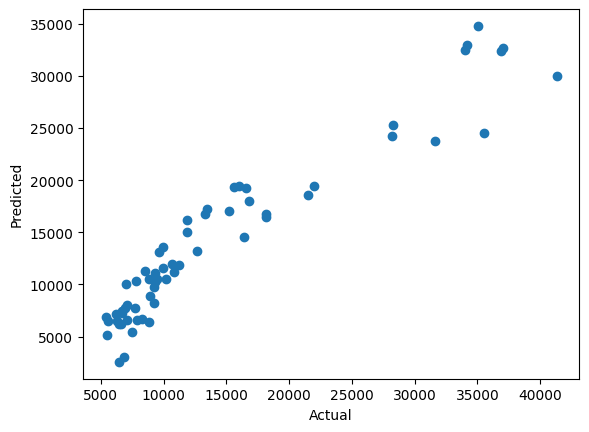

In [196]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

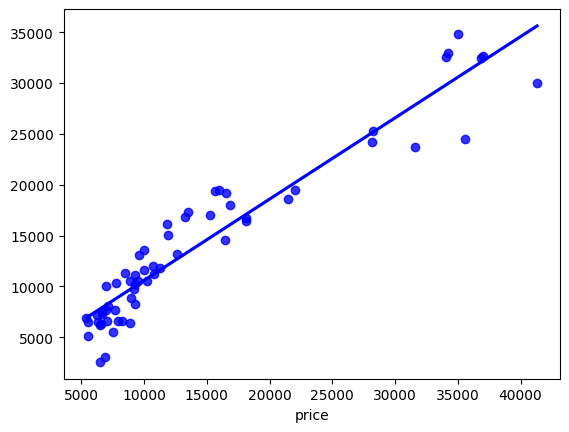

In [199]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='blue');